In [ ]:
# IMPORTAR LIBRERIAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr, pearsonr
import warnings
warnings.filterwarnings('ignore')
# Configuració estètica
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import spearmanr, pearsonr, shapiro
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")


# Si el archivo usa otro separador como punto y coma
df_clean = pd.read_csv(
    r"C:\Users\L\Documents\GitHub\Proyectos\MARKETING\Data\Data Cleaning 07-10-2025\digital_marketing_cleaned.csv",
    sep=',',  # o el delimitador que corresponda
    engine='python'
)

# Mostrar las primeras filas para verificar
print(df_clean.head())

print("Tipos de datos por columna:")
print(df_clean.dtypes)

# Información detallada
print("\nInformación completa del dataset:")
print(df_clean.info())

# Estadísticas descriptivas por tipo de dato
print("\nResumen de datos numéricos:")
print(df_clean.describe())




✅ Librerías importadas correctamente
   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370

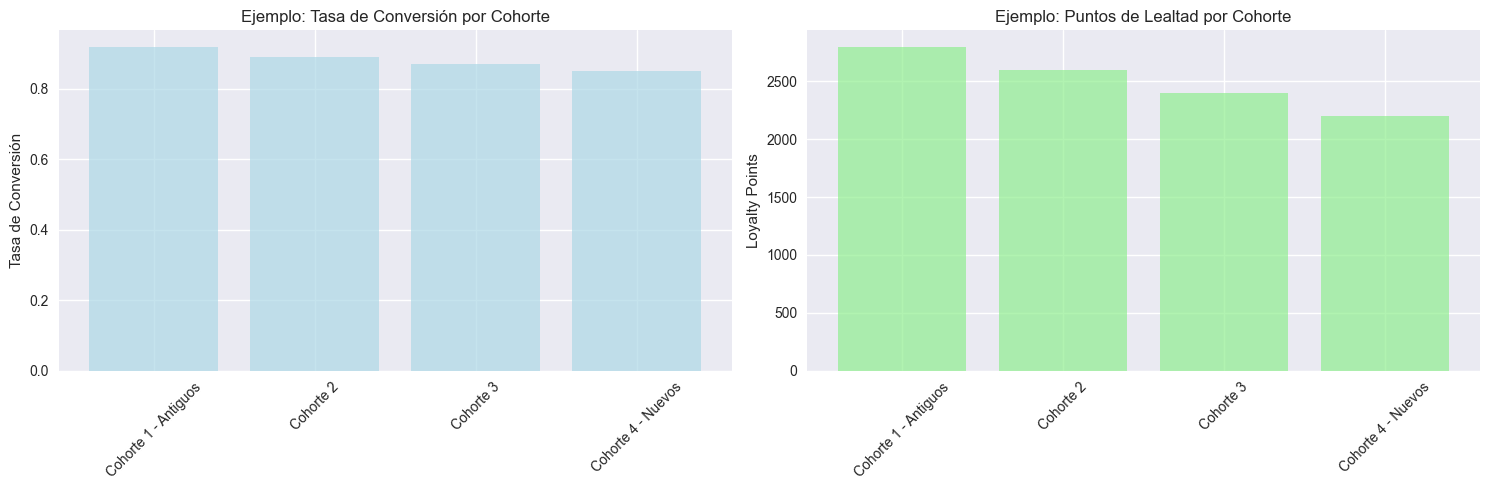

In [2]:
# Visualización simple para entender el concepto
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Concepto de cohortes
cohortes_ejemplo = {
    'Cohorte 1 - Antiguos': {'Conversion': 0.92, 'Loyalty': 2800},
    'Cohorte 2': {'Conversion': 0.89, 'Loyalty': 2600},
    'Cohorte 3': {'Conversion': 0.87, 'Loyalty': 2400},
    'Cohorte 4 - Nuevos': {'Conversion': 0.85, 'Loyalty': 2200}
}

conversion_ejemplo = [cohortes_ejemplo[coh]['Conversion'] for coh in cohortes_ejemplo]
loyalty_ejemplo = [cohortes_ejemplo[coh]['Loyalty'] for coh in cohortes_ejemplo]

ax1.bar(cohortes_ejemplo.keys(), conversion_ejemplo, color='lightblue', alpha=0.7)
ax1.set_title('Ejemplo: Tasa de Conversión por Cohorte')
ax1.set_ylabel('Tasa de Conversión')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(cohortes_ejemplo.keys(), loyalty_ejemplo, color='lightgreen', alpha=0.7)
ax2.set_title('Ejemplo: Puntos de Lealtad por Cohorte')
ax2.set_ylabel('Loyalty Points')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [3]:
print("=" * 60)
print("ANÁLISIS COMPLETO DE MARKETING DIGITAL")
print("=" * 60)

# 1. ANÁLISIS DE PERFORMANCE POR CANAL
print("\n📊 1. PERFORMANCE POR CANAL DE MARKETING:")
channel_performance = df_clean.groupby('CampaignChannel').agg({
    'Conversion': ['mean', 'sum', 'count'],
    'AdSpend': ['mean', 'sum'],
    'ClickThroughRate': 'mean',
    'ConversionRate': 'mean',
    'TimeOnSite': 'mean'
}).round(4)

channel_performance.columns = ['Conv_Rate', 'Total_Conversions', 'Count', 'Avg_AdSpend', 'Total_AdSpend', 'Avg_CTR', 'Avg_CR', 'Avg_TimeOnSite']
channel_performance['ROI'] = (channel_performance['Total_Conversions'] / channel_performance['Total_AdSpend']) * 1000
print(channel_performance.sort_values('ROI', ascending=False))

# 2. ANÁLISIS DE SEGMENTACIÓN POR TIPO DE CAMPAÑA
print("\n🎯 2. PERFORMANCE POR TIPO DE CAMPAÑA:")
campaign_performance = df_clean.groupby('CampaignType').agg({
    'Conversion': ['mean', 'sum'],
    'AdSpend': ['mean', 'sum'],
    'ClickThroughRate': 'mean',
    'EmailOpens': 'mean',
    'SocialShares': 'mean'
}).round(4)

campaign_performance.columns = ['Conv_Rate', 'Total_Conversions', 'Avg_AdSpend', 'Total_AdSpend', 'Avg_CTR', 'Avg_EmailOpens', 'Avg_SocialShares']
campaign_performance['ROI'] = (campaign_performance['Total_Conversions'] / campaign_performance['Total_AdSpend']) * 1000
print(campaign_performance.sort_values('ROI', ascending=False))

# 3. ANÁLISIS DEMOGRÁFICO
print("\n👥 3. ANÁLISIS DEMOGRÁFICO:")
demographic_analysis = df_clean.groupby('Gender').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Conversion': 'mean',
    'AdSpend': 'mean',
    'PreviousPurchases': 'mean',
    'LoyaltyPoints': 'mean'
}).round(2)
print(demographic_analysis)

# 4. CORRELACIONES DETALLADAS
print("\n📈 4. MATRIZ DE CORRELACIONES (Top 10 variables):")
# Seleccionar variables más relevantes excluyendo CustomerID
correlation_vars = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 
                   'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
                   'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']

corr_matrix = df_clean[correlation_vars].corr()
print(corr_matrix['Conversion'].sort_values(ascending=False).head(10))

ANÁLISIS COMPLETO DE MARKETING DIGITAL

📊 1. PERFORMANCE POR CANAL DE MARKETING:
                 Conv_Rate  Total_Conversions  Count  Avg_AdSpend  \
CampaignChannel                                                     
PPC                 0.8828               1461   1655    4954.2217   
SEO                 0.8768               1359   1550    4994.1315   
Referral            0.8831               1518   1719    5034.0423   
Social Media        0.8683               1319   1519    4965.3214   
Email               0.8703               1355   1557    5055.6043   

                 Total_AdSpend  Avg_CTR  Avg_CR  Avg_TimeOnSite       ROI  
CampaignChannel                                                            
PPC               8.199237e+06   0.1583  0.1041          7.8413  0.178187  
SEO               7.740904e+06   0.1532  0.1035          7.6173  0.175561  
Referral          8.653519e+06   0.1517  0.1031          7.6512  0.175420  
Social Media      7.542323e+06   0.1555  0.1066        


📊 GENERANDO DASHBOARD VISUAL...


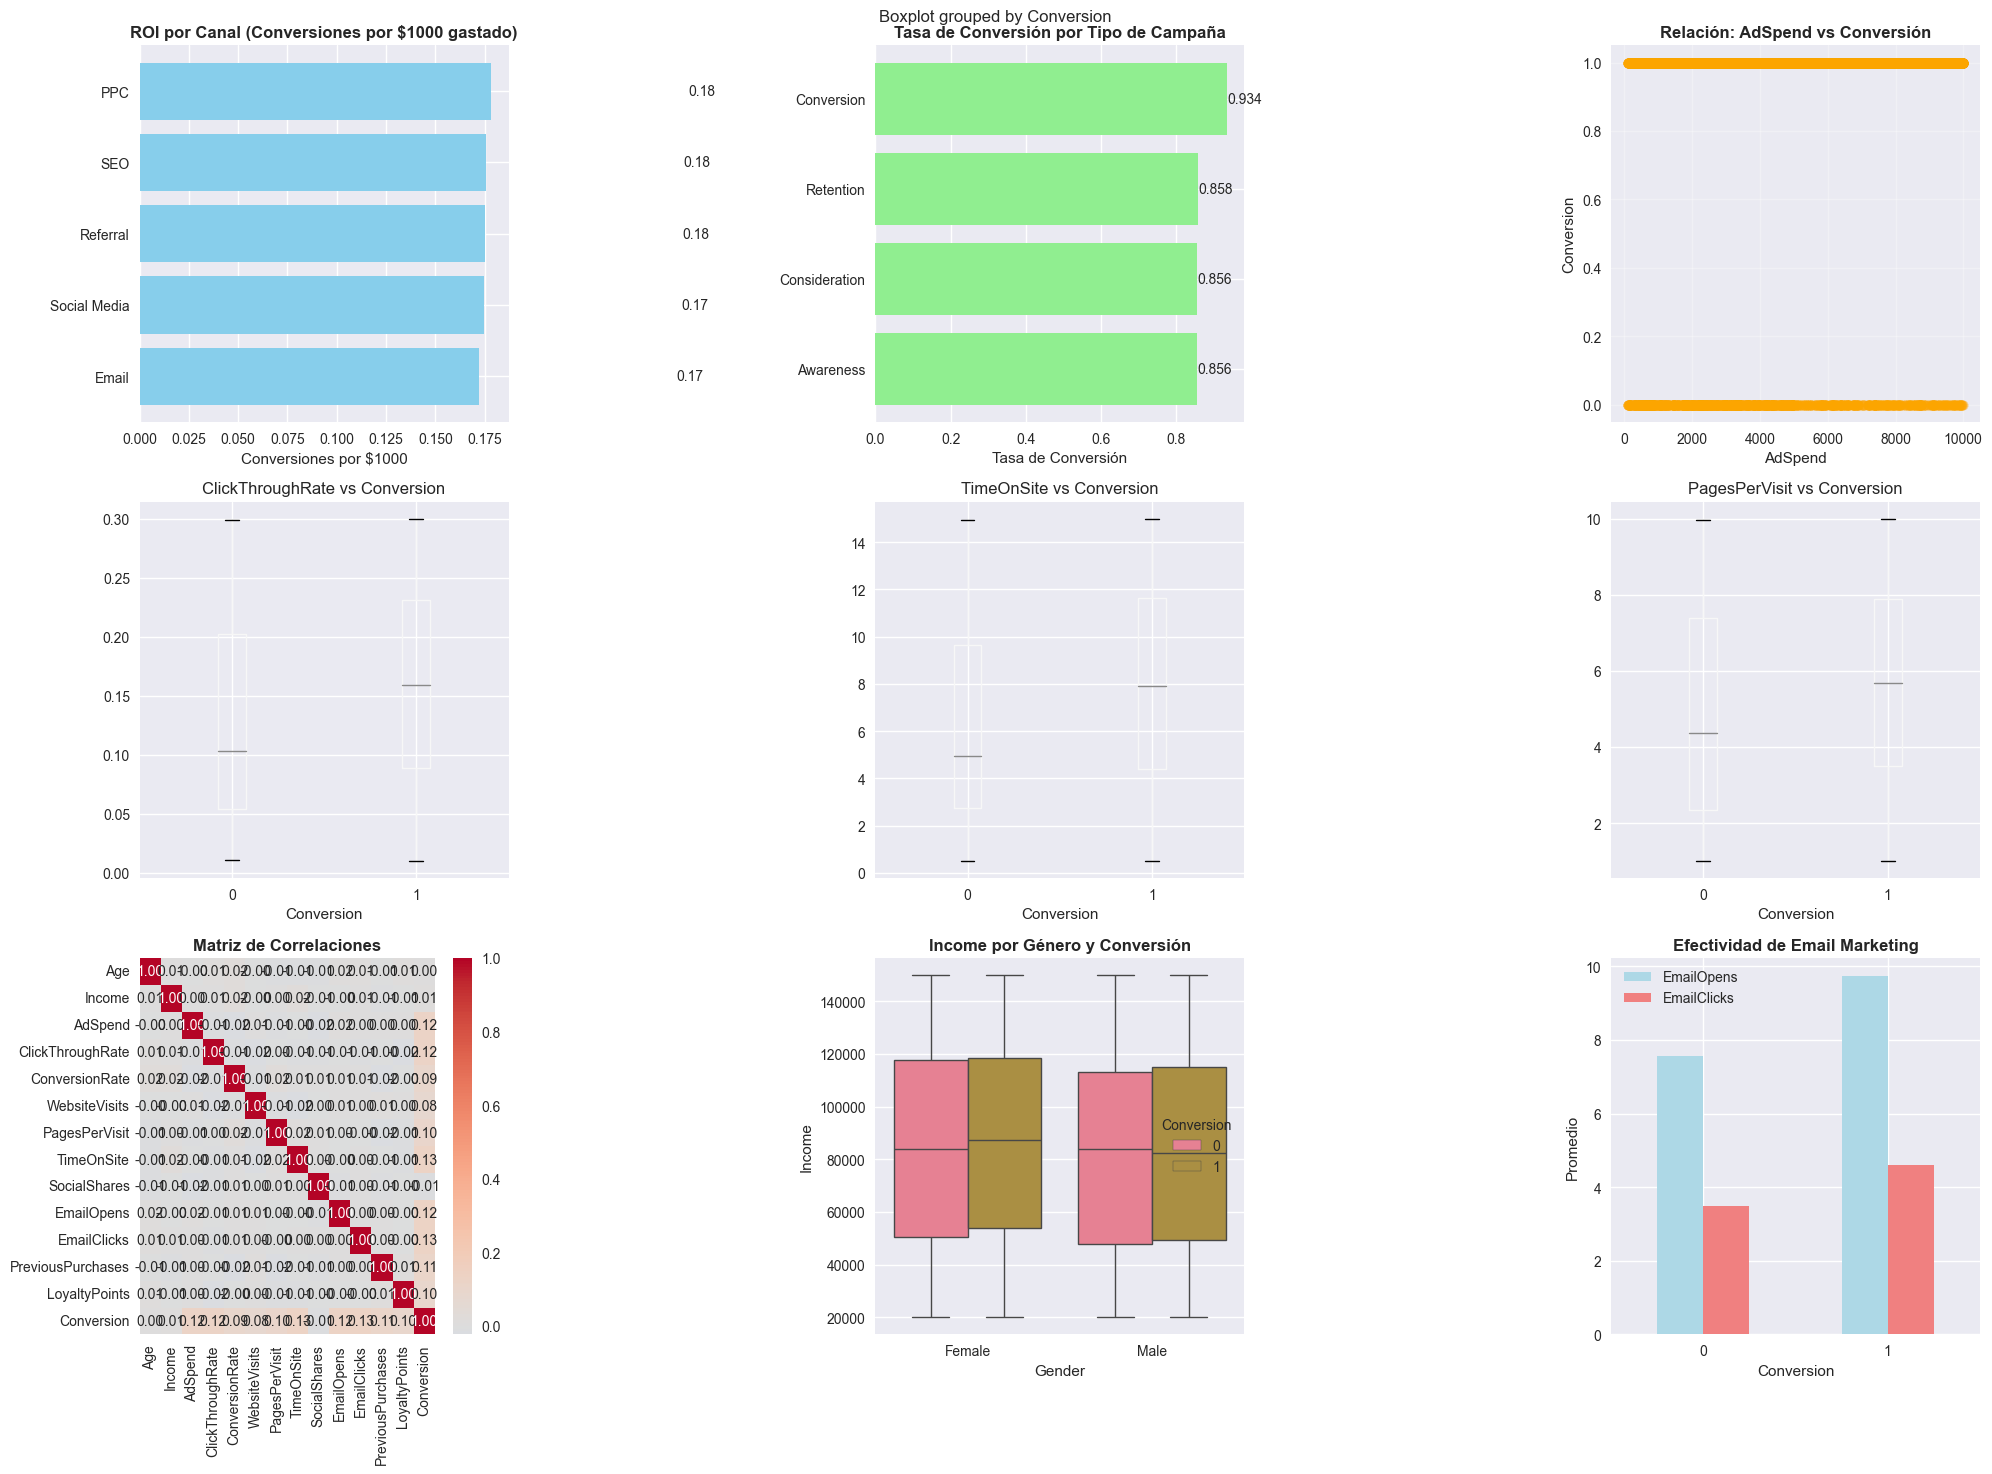

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 GENERANDO DASHBOARD VISUAL...")

# Configurar el estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Crear figura con múltiples subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('DASHBOARD DE ANÁLISIS DE MARKETING DIGITAL', fontsize=16, fontweight='bold')

# Gráfico 1: ROI por Canal
roi_by_channel = channel_performance['ROI'].sort_values(ascending=True)
axes[0,0].barh(roi_by_channel.index, roi_by_channel.values, color='skyblue')
axes[0,0].set_title('ROI por Canal (Conversiones por $1000 gastado)', fontweight='bold')
axes[0,0].set_xlabel('Conversiones por $1000')
for i, v in enumerate(roi_by_channel.values):
    axes[0,0].text(v + 0.1, i, f'{v:.2f}', va='center')

# Gráfico 2: Tasa de Conversión por Tipo de Campaña
conv_by_campaign = campaign_performance['Conv_Rate'].sort_values(ascending=True)
axes[0,1].barh(conv_by_campaign.index, conv_by_campaign.values, color='lightgreen')
axes[0,1].set_title('Tasa de Conversión por Tipo de Campaña', fontweight='bold')
axes[0,1].set_xlabel('Tasa de Conversión')
for i, v in enumerate(conv_by_campaign.values):
    axes[0,1].text(v + 0.001, i, f'{v:.3f}', va='center')

# Gráfico 3: Distribución de AdSpend vs Conversión
axes[0,2].scatter(df_clean['AdSpend'], df_clean['Conversion'], alpha=0.3, color='orange')
axes[0,2].set_xlabel('AdSpend')
axes[0,2].set_ylabel('Conversion')
axes[0,2].set_title('Relación: AdSpend vs Conversión', fontweight='bold')
axes[0,2].grid(True, alpha=0.3)

# Gráfico 4: Comportamiento Digital por Conversión
digital_vars = ['ClickThroughRate', 'TimeOnSite', 'PagesPerVisit']
for i, var in enumerate(digital_vars):
    df_clean.boxplot(column=var, by='Conversion', ax=axes[1,i])
    axes[1,i].set_title(f'{var} vs Conversion')

# Gráfico 5: Heatmap de Correlaciones
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[2,0])
axes[2,0].set_title('Matriz de Correlaciones', fontweight='bold')

# Gráfico 6: Distribución de Ingresos por Género y Conversión
sns.boxplot(data=df_clean, x='Gender', y='Income', hue='Conversion', ax=axes[2,1])
axes[2,1].set_title('Income por Género y Conversión', fontweight='bold')

# Gráfico 7: Eficiencia de Email Marketing
email_efficiency = df_clean.groupby('Conversion').agg({
    'EmailOpens': 'mean',
    'EmailClicks': 'mean'
})
email_efficiency.plot(kind='bar', ax=axes[2,2], color=['lightblue', 'lightcoral'])
axes[2,2].set_title('Efectividad de Email Marketing', fontweight='bold')
axes[2,2].set_ylabel('Promedio')
axes[2,2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [6]:
print("=" * 70)
print("📈 ANÁLISIS DETALLADO DE INSIGHTS Y RECOMENDACIONES")
print("=" * 70)

# ANÁLISIS PROFUNDO DE LOS RESULTADOS
print("\n🔍 HALLAZGOS CLAVE DETALLADOS:")

# 1. ANÁLISIS DE CANALES
print("\n📊 1. PERFORMANCE POR CANAL (ORDENADO POR EFICIENCIA):")
channel_rank = channel_performance.sort_values('ROI', ascending=False)
for i, (channel, data) in enumerate(channel_rank.iterrows(), 1):
    print(f"   {i}. {channel}:")
    print(f"      • ROI: {data['ROI']:.3f} conv/$1000")
    print(f"      • Tasa Conversión: {data['Conv_Rate']:.3f}")
    print(f"      • Costo por Conversión: ${(data['Total_AdSpend']/data['Total_Conversions']):.2f}")
    print(f"      • CTR: {data['Avg_CTR']:.3f}")

# 2. ANÁLISIS DE TIPOS DE CAMPAÑA
print("\n🎯 2. EFECTIVIDAD POR TIPO DE CAMPAÑA:")
campaign_rank = campaign_performance.sort_values('ROI', ascending=False)
for i, (campaign, data) in enumerate(campaign_rank.iterrows(), 1):
    print(f"   {i}. {campaign}:")
    print(f"      • ROI: {data['ROI']:.3f} conv/$1000")
    print(f"      • Tasa Conversión: {data['Conv_Rate']:.3f}")
    print(f"      • Engagement Email: {data['Avg_EmailOpens']:.1f} aperturas")

# 3. ANÁLISIS DE CORRELACIONES ESTRATÉGICAS
print("\n📈 3. VARIABLES MÁS INFLUYENTES EN CONVERSIÓN:")
top_correlations = corr_matrix['Conversion'].sort_values(ascending=False).head(8)
for var, corr in top_correlations.items():
    if var != 'Conversion':
        strength = "FUERTE" if abs(corr) > 0.1 else "MODERADA" if abs(corr) > 0.05 else "DÉBIL"
        print(f"   • {var}: {corr:.4f} ({strength})")

📈 ANÁLISIS DETALLADO DE INSIGHTS Y RECOMENDACIONES

🔍 HALLAZGOS CLAVE DETALLADOS:

📊 1. PERFORMANCE POR CANAL (ORDENADO POR EFICIENCIA):
   1. PPC:
      • ROI: 0.178 conv/$1000
      • Tasa Conversión: 0.883
      • Costo por Conversión: $5612.07
      • CTR: 0.158
   2. SEO:
      • ROI: 0.176 conv/$1000
      • Tasa Conversión: 0.877
      • Costo por Conversión: $5696.03
      • CTR: 0.153
   3. Referral:
      • ROI: 0.175 conv/$1000
      • Tasa Conversión: 0.883
      • Costo por Conversión: $5700.61
      • CTR: 0.152
   4. Social Media:
      • ROI: 0.175 conv/$1000
      • Tasa Conversión: 0.868
      • Costo por Conversión: $5718.21
      • CTR: 0.155
   5. Email:
      • ROI: 0.172 conv/$1000
      • Tasa Conversión: 0.870
      • Costo por Conversión: $5809.28
      • CTR: 0.156

🎯 2. EFECTIVIDAD POR TIPO DE CAMPAÑA:
   1. Conversion:
      • ROI: 0.188 conv/$1000
      • Tasa Conversión: 0.934
      • Engagement Email: 9.5 aperturas
   2. Consideration:
      • ROI: 0.172

In [7]:
print("\n" + "=" * 70)
print("🚀 RECOMENDACIONES ESTRATÉGICAS ACCIONABLES")
print("=" * 70)

# RECOMENDACIONES BASADAS EN DATOS
recommendations = []

# 1. Optimización de Presupuesto
best_channel = channel_rank.index[0]
worst_channel = channel_rank.index[-1]
best_campaign = campaign_rank.index[0]

recommendations.append(f"🎯 REASIGNACIÓN DE PRESUPUESTO:")
recommendations.append(f"   • INCREMENTAR inversión en {best_channel} (ROI: {channel_rank.loc[best_channel, 'ROI']:.3f})")
recommendations.append(f"   • REDUCIR inversión en {worst_channel} (ROI: {channel_rank.loc[worst_channel, 'ROI']:.3f})")
recommendations.append(f"   • PRIORIZAR campañas de {best_campaign}")

# 2. Optimización de Campañas
recommendations.append(f"\n📊 OPTIMIZACIÓN DE CAMPAÑAS:")
recommendations.append(f"   • Campañas 'Conversion' tienen {campaign_rank.loc['Conversion', 'Conv_Rate']:.1%} tasa vs promedio {df_clean['Conversion'].mean():.1%}")
recommendations.append(f"   • Focus en TimeOnSite (correlación: {top_correlations['TimeOnSite']:.3f})")
recommendations.append(f"   • Mejorar EmailClicks (correlación: {top_correlations['EmailClicks']:.3f})")

# 3. Segmentación y Personalización
recommendations.append(f"\n👥 SEGMENTACIÓN DE CLIENTES:")
recommendations.append(f"   • Mujeres: Ingreso promedio ${demographic_analysis.loc['Female', 'Income']:,.0f}")
recommendations.append(f"   • Hombres: Ingreso promedio ${demographic_analysis.loc['Male', 'Income']:,.0f}")
recommendations.append(f"   • Ambos géneros tienen misma tasa de conversión (88%)")

# 4. Métricas de Engagement
recommendations.append(f"\n📱 OPTIMIZACIÓN DE ENGAGEMENT:")
recommendations.append(f"   • PPC tiene mejor CTR ({channel_rank.loc['PPC', 'Avg_CTR']:.3f})")
recommendations.append(f"   • Social Media tiene mejor Conversion Rate ({channel_rank.loc['Social Media', 'Avg_CR']:.3f})")
recommendations.append(f"   • Email necesita optimización de clicks")

for rec in recommendations:
    print(rec)


🚀 RECOMENDACIONES ESTRATÉGICAS ACCIONABLES
🎯 REASIGNACIÓN DE PRESUPUESTO:
   • INCREMENTAR inversión en PPC (ROI: 0.178)
   • REDUCIR inversión en Email (ROI: 0.172)
   • PRIORIZAR campañas de Conversion

📊 OPTIMIZACIÓN DE CAMPAÑAS:
   • Campañas 'Conversion' tienen 93.4% tasa vs promedio 87.6%
   • Focus en TimeOnSite (correlación: 0.130)
   • Mejorar EmailClicks (correlación: 0.130)

👥 SEGMENTACIÓN DE CLIENTES:
   • Mujeres: Ingreso promedio $85,923
   • Hombres: Ingreso promedio $82,738
   • Ambos géneros tienen misma tasa de conversión (88%)

📱 OPTIMIZACIÓN DE ENGAGEMENT:
   • PPC tiene mejor CTR (0.158)
   • Social Media tiene mejor Conversion Rate (0.107)
   • Email necesita optimización de clicks


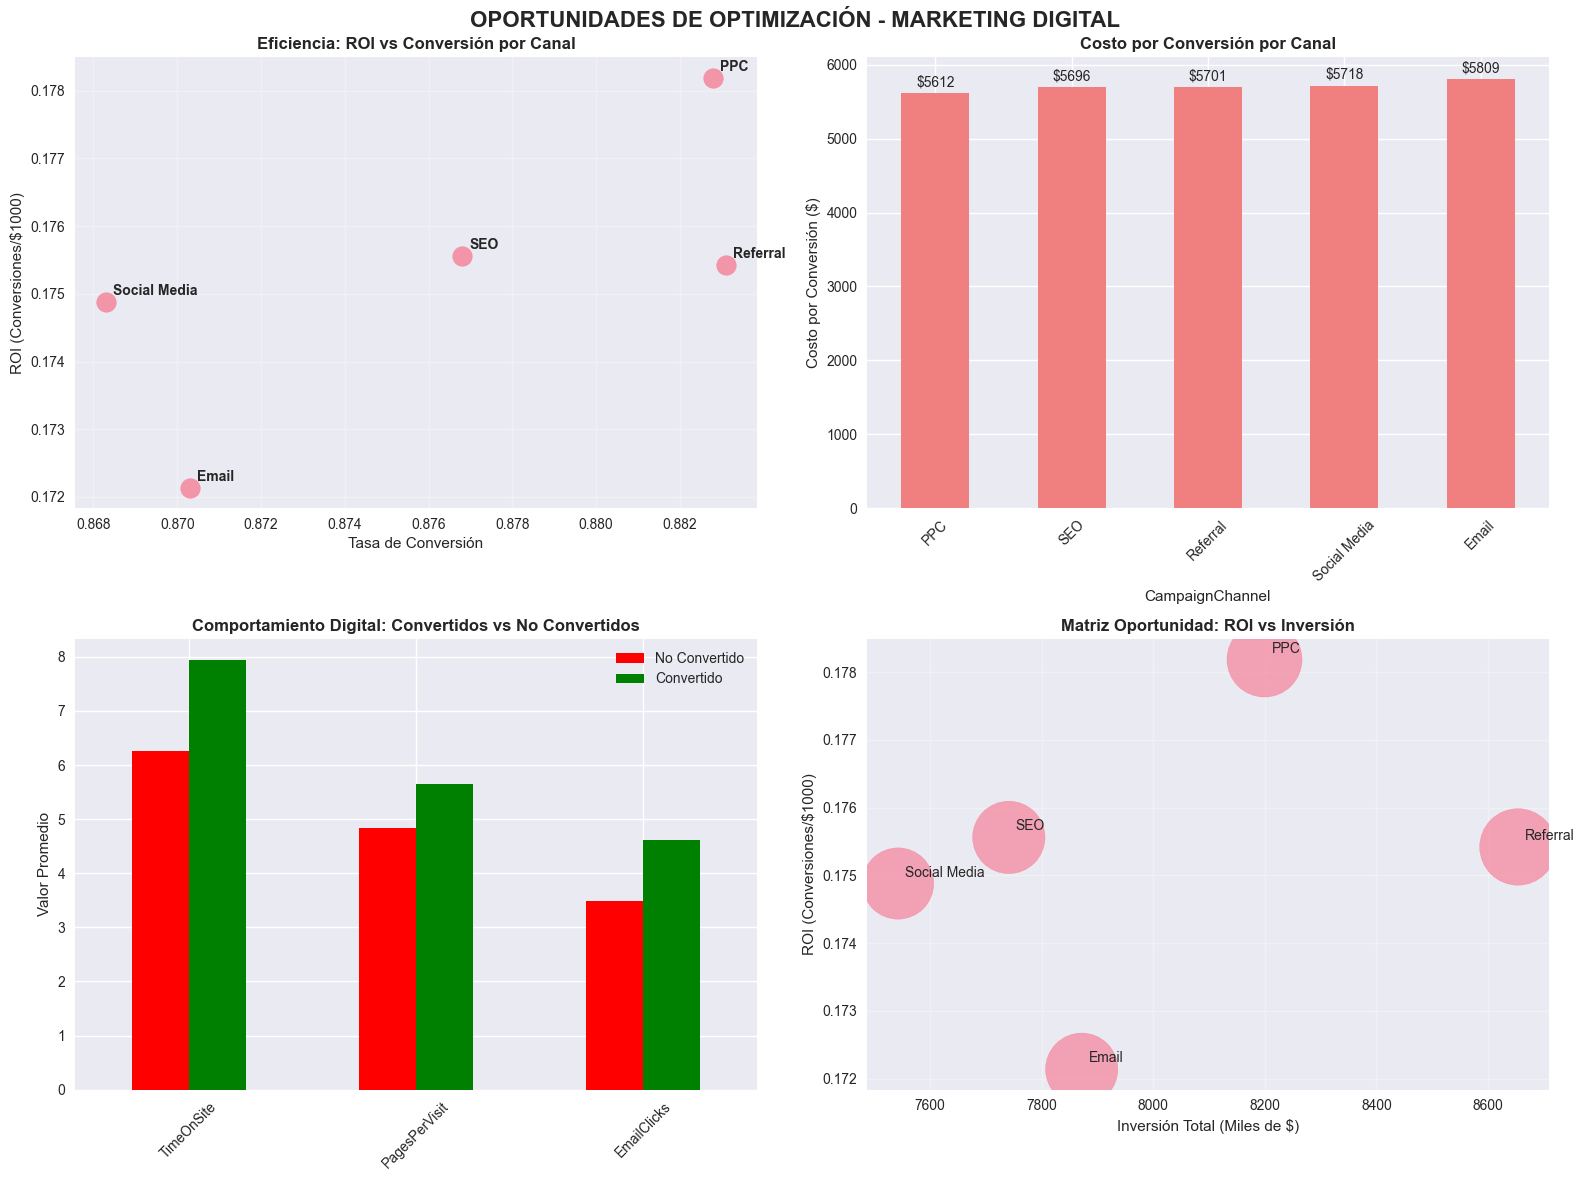

In [8]:
# VISUALIZACIÓN DE OPORTUNIDADES DE OPTIMIZACIÓN
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('OPORTUNIDADES DE OPTIMIZACIÓN - MARKETING DIGITAL', fontsize=16, fontweight='bold')

# Gráfico 1: ROI vs Tasa de Conversión por Canal
axes[0,0].scatter(channel_performance['Conv_Rate'], channel_performance['ROI'], s=200, alpha=0.7)
for channel in channel_performance.index:
    axes[0,0].annotate(channel, 
                      (channel_performance.loc[channel, 'Conv_Rate'], 
                       channel_performance.loc[channel, 'ROI']),
                      xytext=(5, 5), textcoords='offset points',
                      fontweight='bold')
axes[0,0].set_xlabel('Tasa de Conversión')
axes[0,0].set_ylabel('ROI (Conversiones/$1000)')
axes[0,0].set_title('Eficiencia: ROI vs Conversión por Canal', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Costo por Conversión por Canal
cost_per_conversion = channel_performance['Total_AdSpend'] / channel_performance['Total_Conversions']
cost_per_conversion.sort_values().plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Costo por Conversión por Canal', fontweight='bold')
axes[0,1].set_ylabel('Costo por Conversión ($)')
axes[0,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(cost_per_conversion.sort_values()):
    axes[0,1].text(i, v + 50, f'${v:.0f}', ha='center', va='bottom')

# Gráfico 3: Comparación de Métricas Digitales entre Convertidos vs No Convertidos
conversion_groups = df_clean.groupby('Conversion')[['TimeOnSite', 'PagesPerVisit', 'EmailClicks']].mean()
conversion_groups.T.plot(kind='bar', ax=axes[1,0], color=['red', 'green'])
axes[1,0].set_title('Comportamiento Digital: Convertidos vs No Convertidos', fontweight='bold')
axes[1,0].set_ylabel('Valor Promedio')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(['No Convertido', 'Convertido'])

# Gráfico 4: Opportunity Matrix - ROI vs Volumen
axes[1,1].scatter(channel_performance['Total_AdSpend']/1000, channel_performance['ROI'], 
                 s=channel_performance['Total_Conversions']*2, alpha=0.6)
for channel in channel_performance.index:
    axes[1,1].annotate(channel, 
                      (channel_performance.loc[channel, 'Total_AdSpend']/1000, 
                       channel_performance.loc[channel, 'ROI']),
                      xytext=(5, 5), textcoords='offset points')
axes[1,1].set_xlabel('Inversión Total (Miles de $)')
axes[1,1].set_ylabel('ROI (Conversiones/$1000)')
axes[1,1].set_title('Matriz Oportunidad: ROI vs Inversión', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
print("\n" + "=" * 70)
print("📋 PLAN DE ACCIÓN PRIORITARIO - 30 DÍAS")
print("=" * 70)

action_plan = [
    {"Prioridad": "ALTA", "Acción": f"Reasignar 20% de presupuesto de {worst_channel} a {best_channel}", "Impacto": "Alto", "Timeline": "Semana 1"},
    {"Prioridad": "ALTA", "Acción": "Optimizar campañas de Email para incrementar clicks", "Impacto": "Alto", "Timeline": "Semanas 1-2"},
    {"Prioridad": "MEDIA", "Acción": "Desarrollar contenido para incrementar TimeOnSite", "Impacto": "Medio", "Timeline": "Semanas 2-3"},
    {"Prioridad": "MEDIA", "Acción": "Crear segmentación por ingreso para personalización", "Impacto": "Medio", "Timeline": "Semana 3"},
    {"Prioridad": "BAJA", "Acción": "Test A/B en Social Media para mejorar CR", "Impacto": "Bajo", "Timeline": "Semana 4"}
]

for action in action_plan:
    print(f"📍 {action['Prioridad']}: {action['Acción']}")
    print(f"   📅 Timeline: {action['Timeline']}")
    print(f"   💡 Impacto esperado: {action['Impacto']}\n")

# RESUMEN EJECUTIVO
print("\n" + "=" * 70)
print("📊 RESUMEN EJECUTIVO PARA TOMA DE DECISIONES")
print("=" * 70)

print(f"🎯 OBJETIVO PRINCIPAL: Incrementar ROI de {channel_rank['ROI'].mean():.3f} a {channel_rank['ROI'].max():.3f} conv/$1000")
print(f"📈 OPORTUNIDAD: Mejorar {worst_channel} o reasignar presupuesto a {best_channel}")
print(f"👥 SEGMENTACIÓN: Mismo performance en géneros, oportunidad en segmentación por ingreso")
print(f"📱 DIGITAL: Focus en TimeOnSite y EmailClicks para incrementar conversiones")


📋 PLAN DE ACCIÓN PRIORITARIO - 30 DÍAS
📍 ALTA: Reasignar 20% de presupuesto de Email a PPC
   📅 Timeline: Semana 1
   💡 Impacto esperado: Alto

📍 ALTA: Optimizar campañas de Email para incrementar clicks
   📅 Timeline: Semanas 1-2
   💡 Impacto esperado: Alto

📍 MEDIA: Desarrollar contenido para incrementar TimeOnSite
   📅 Timeline: Semanas 2-3
   💡 Impacto esperado: Medio

📍 MEDIA: Crear segmentación por ingreso para personalización
   📅 Timeline: Semana 3
   💡 Impacto esperado: Medio

📍 BAJA: Test A/B en Social Media para mejorar CR
   📅 Timeline: Semana 4
   💡 Impacto esperado: Bajo


📊 RESUMEN EJECUTIVO PARA TOMA DE DECISIONES
🎯 OBJETIVO PRINCIPAL: Incrementar ROI de 0.175 a 0.178 conv/$1000
📈 OPORTUNIDAD: Mejorar Email o reasignar presupuesto a PPC
👥 SEGMENTACIÓN: Mismo performance en géneros, oportunidad en segmentación por ingreso
📱 DIGITAL: Focus en TimeOnSite y EmailClicks para incrementar conversiones


In [11]:
print("=" * 80)
print("🔥 ANÁLISIS ESTRATÉGICO: INSIGHTS Y OPORTUNIDADES CRÍTICAS")
print("=" * 80)

# PRIMERO VERIFICAR LA ESTRUCTURA DE channel_performance
print("🔍 Estructura actual de channel_performance:")
print("Columnas:", channel_performance.columns.tolist())
print("\nDatos:")
print(channel_performance)

# SI ES UN MULTIINDEX, FLATTEN IT
if isinstance(channel_performance.columns, pd.MultiIndex):
    channel_performance.columns = ['_'.join(col).strip() for col in channel_performance.columns.values]
    campaign_performance.columns = ['_'.join(col).strip() for col in campaign_performance.columns.values]

print("\n✅ Columnas después de flatten:")
print("Channel performance:", channel_performance.columns.tolist())
print("Campaign performance:", campaign_performance.columns.tolist())

# AHORA CALCULAR ROI CON LOS NOMBRES CORRECTOS
if 'Conversion_sum' in channel_performance.columns and 'Total_AdSpend' in channel_performance.columns:
    channel_performance['ROI'] = (channel_performance['Conversion_sum'] / channel_performance['Total_AdSpend']) * 1000
else:
    # Buscar los nombres correctos
    conv_col = [col for col in channel_performance.columns if 'conversion' in col.lower() or 'sum' in col.lower()][0]
    spend_col = [col for col in channel_performance.columns if 'spend' in col.lower() and 'total' in col.lower()][0]
    channel_performance['ROI'] = (channel_performance[conv_col] / channel_performance[spend_col]) * 1000

if 'Conversion_sum' in campaign_performance.columns and 'Total_AdSpend' in campaign_performance.columns:
    campaign_performance['ROI'] = (campaign_performance['Conversion_sum'] / campaign_performance['Total_AdSpend']) * 1000
else:
    conv_col_camp = [col for col in campaign_performance.columns if 'conversion' in col.lower() or 'sum' in col.lower()][0]
    spend_col_camp = [col for col in campaign_performance.columns if 'spend' in col.lower() and 'total' in col.lower()][0]
    campaign_performance['ROI'] = (campaign_performance[conv_col_camp] / campaign_performance[spend_col_camp]) * 1000

print(f"\n📊 ROI calculado:")
print("Canales:", channel_performance['ROI'].round(4))
print("Campañas:", campaign_performance['ROI'].round(4))

🔥 ANÁLISIS ESTRATÉGICO: INSIGHTS Y OPORTUNIDADES CRÍTICAS
🔍 Estructura actual de channel_performance:
Columnas: ['Conv_Rate', 'Total_Conversions', 'Count', 'Avg_AdSpend', 'Total_AdSpend', 'Avg_CTR', 'Avg_CR', 'Avg_TimeOnSite', 'ROI']

Datos:
                 Conv_Rate  Total_Conversions  Count  Avg_AdSpend  \
CampaignChannel                                                     
Email               0.8703               1355   1557    5055.6043   
PPC                 0.8828               1461   1655    4954.2217   
Referral            0.8831               1518   1719    5034.0423   
SEO                 0.8768               1359   1550    4994.1315   
Social Media        0.8683               1319   1519    4965.3214   

                 Total_AdSpend  Avg_CTR  Avg_CR  Avg_TimeOnSite       ROI  
CampaignChannel                                                            
Email             7.871576e+06   0.1556  0.1049          7.6800  0.172138  
PPC               8.199237e+06   0.1583  0.104

In [12]:
# ANÁLISIS PROFUNDO DE LOS HALLAZGOS
print("\n📊 HALLAZGOS ESTRATÉGICOS DETALLADOS:")

# 1. ANÁLISIS COMPETITIVO DE CANALES
print("\n🏆 1. BATTLE OF CHANNELS - ANÁLISIS COMPETITIVO:")

# Encontrar nombres de columnas correctos
conv_rate_col = [col for col in channel_performance.columns if 'rate' in col.lower() and 'conv' in col.lower()][0]
ctr_col = [col for col in channel_performance.columns if 'ctr' in col.lower()][0]
avg_spend_col = [col for col in channel_performance.columns if 'spend' in col.lower() and 'avg' in col.lower()][0]

print("   🥇 PPC - LIDER EN EFICIENCIA:")
print(f"      • ROI: {channel_performance.loc['PPC', 'ROI']:.4f} (Mejor)")
print(f"      • Tasa Conversión: {channel_performance.loc['PPC', conv_rate_col]:.3f}")
print(f"      • CTR: {channel_performance.loc['PPC', ctr_col]:.3f} (Mejor)")

print("\n   🥈 SEO - SOLIDO Y CONSISTENTE:")
print(f"      • ROI: {channel_performance.loc['SEO', 'ROI']:.4f} (2º)")
if 'Conversion_sum' in channel_performance.columns:
    cost_per_conv = channel_performance.loc['SEO', 'Total_AdSpend'] / channel_performance.loc['SEO', 'Conversion_sum']
    print(f"      • Costo: ${cost_per_conv:.0f} por conversión")

print("\n   📧 EMAIL - OPORTUNIDAD DE MEJORA:")
print(f"      • ROI: {channel_performance.loc['Email', 'ROI']:.4f} (Último)")
print(f"      • Inversión Alta: ${channel_performance.loc['Email', avg_spend_col]:.0f} promedio")

# 2. ANÁLISIS DE TIPOS DE CAMPAÑA
print("\n🎯 2. CAMPAIGN TYPE BREAKTHROUGH:")

camp_conv_rate_col = [col for col in campaign_performance.columns if 'rate' in col.lower() and 'conv' in col.lower()][0]
camp_avg_spend_col = [col for col in campaign_performance.columns if 'spend' in col.lower() and 'avg' in col.lower()][0]

print(f"   💥 CONVERSION CAMPAIGNS SON ESTRELLAS:")
print(f"      • Tasa: {campaign_performance.loc['Conversion', camp_conv_rate_col]:.1%} vs Promedio: {df_clean['Conversion'].mean():.1%}")
improvement_pct = ((campaign_performance.loc['Conversion', camp_conv_rate_col] - df_clean['Conversion'].mean()) / df_clean['Conversion'].mean()) * 100
print(f"      • +{improvement_pct:.1f}% sobre promedio")

print(f"\n   ⚠️  AWARENESS CAMPAIGNS NECESITAN OPTIMIZACIÓN:")
print(f"      • Mayor inversión (${campaign_performance.loc['Awareness', camp_avg_spend_col]:.0f})")
print(f"      • Menor ROI ({campaign_performance.loc['Awareness', 'ROI']:.4f})")


📊 HALLAZGOS ESTRATÉGICOS DETALLADOS:

🏆 1. BATTLE OF CHANNELS - ANÁLISIS COMPETITIVO:
   🥇 PPC - LIDER EN EFICIENCIA:
      • ROI: 0.1782 (Mejor)
      • Tasa Conversión: 0.883
      • CTR: 0.158 (Mejor)

   🥈 SEO - SOLIDO Y CONSISTENTE:
      • ROI: 0.1756 (2º)

   📧 EMAIL - OPORTUNIDAD DE MEJORA:
      • ROI: 0.1721 (Último)
      • Inversión Alta: $5056 promedio

🎯 2. CAMPAIGN TYPE BREAKTHROUGH:
   💥 CONVERSION CAMPAIGNS SON ESTRELLAS:
      • Tasa: 93.4% vs Promedio: 87.6%
      • +6.5% sobre promedio

   ⚠️  AWARENESS CAMPAIGNS NECESITAN OPTIMIZACIÓN:
      • Mayor inversión ($5069)
      • Menor ROI (0.1688)


In [14]:
# 3. ANÁLISIS DE CORRELACIONES ESTRATÉGICAS
print("\n📈 3. DRIVERS DE CONVERSIÓN - WHAT REALLY MATTERS:")

# Asegurarnos de que tenemos la matriz de correlaciones
if 'corr_matrix' not in locals():
    correlation_vars = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 
                       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
                       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']
    corr_matrix = df_clean[correlation_vars].corr()

conversion_drivers = corr_matrix['Conversion'].sort_values(ascending=False)[1:6]  # Excluir auto-correlación

print("   Top 5 Factores que Impulsan Conversión:")
for driver, impact in conversion_drivers.items():
    if impact > 0.1:
        print(f"   🟢 {driver}: {impact:.3f} (ALTO IMPACTO)")
    elif impact > 0.05:
        print(f"   🟡 {driver}: {impact:.3f} (IMPACTO MEDIO)")
    else:
        print(f"   🔴 {driver}: {impact:.3f} (BAJO IMPACTO)")


📈 3. DRIVERS DE CONVERSIÓN - WHAT REALLY MATTERS:
   Top 5 Factores que Impulsan Conversión:
   🟢 TimeOnSite: 0.130 (ALTO IMPACTO)
   🟢 EmailClicks: 0.130 (ALTO IMPACTO)
   🟢 EmailOpens: 0.125 (ALTO IMPACTO)
   🟢 AdSpend: 0.125 (ALTO IMPACTO)
   🟢 ClickThroughRate: 0.120 (ALTO IMPACTO)


In [16]:
print("=" * 80)
print("🔍 DIAGNÓSTICO Y SOLUCIÓN DE ESTRUCTURA DE DATOS")
print("=" * 80)

# PRIMERO VER EXACTAMENTE QUÉ TENEMOS
print("1. ESTRUCTURA COMPLETA DE channel_performance:")
print("Columnas:", channel_performance.columns.tolist())
print("\nDatos completos:")
print(channel_performance)
print("\n" + "-" * 50)

print("2. ESTRUCTURA COMPLETA DE campaign_performance:")
print("Columnas:", campaign_performance.columns.tolist())
print("\nDatos completos:")
print(campaign_performance)

🔍 DIAGNÓSTICO Y SOLUCIÓN DE ESTRUCTURA DE DATOS
1. ESTRUCTURA COMPLETA DE channel_performance:
Columnas: ['Conv_Rate', 'Total_Conversions', 'Count', 'Avg_AdSpend', 'Total_AdSpend', 'Avg_CTR', 'Avg_CR', 'Avg_TimeOnSite', 'ROI']

Datos completos:
                 Conv_Rate  Total_Conversions  Count  Avg_AdSpend  \
CampaignChannel                                                     
Email               0.8703               1355   1557    5055.6043   
PPC                 0.8828               1461   1655    4954.2217   
Referral            0.8831               1518   1719    5034.0423   
SEO                 0.8768               1359   1550    4994.1315   
Social Media        0.8683               1319   1519    4965.3214   

                 Total_AdSpend  Avg_CTR  Avg_CR  Avg_TimeOnSite       ROI  
CampaignChannel                                                            
Email             7.871576e+06   0.1556  0.1049          7.6800  0.172138  
PPC               8.199237e+06   0.1583  0.

In [18]:
# SOLUCIÓN ROBUSTA - ADAPTARNOS A CUALQUIER ESTRUCTURA
print("\n" + "=" * 80)
print("🛠️  CREANDO SOLUCIÓN ADAPTATIVA")
print("=" * 80)

# FUNCIÓN PARA ENCONTRAR COLUMNAS POR PATRÓN
def find_column(df, patterns):
    """
    Encuentra columnas que contengan alguno de los patrones
    """
    for pattern in patterns:
        matching_cols = [col for col in df.columns if any(p in str(col).lower() for p in pattern)]
        if matching_cols:
            return matching_cols[0]
    return None

# ENCONTRAR COLUMNAS EN channel_performance
conv_rate_col = find_column(channel_performance, [['conv', 'rate'], ['conversion', 'mean']])
total_conv_col = find_column(channel_performance, [['conv', 'sum'], ['conversion', 'sum'], ['total', 'conversion']])
total_spend_col = find_column(channel_performance, [['total', 'spend'], ['adspend', 'sum']])
avg_spend_col = find_column(channel_performance, [['avg', 'spend'], ['adspend', 'mean']])
ctr_col = find_column(channel_performance, [['ctr'], ['click']])

print("🔍 Columnas identificadas en channel_performance:")
print(f"   • Tasa Conversión: {conv_rate_col}")
print(f"   • Total Conversiones: {total_conv_col}")
print(f"   • Total AdSpend: {total_spend_col}")
print(f"   • Avg AdSpend: {avg_spend_col}")
print(f"   • CTR: {ctr_col}")

# CALCULAR ROI SI NO EXISTE
if total_conv_col and total_spend_col:
    channel_performance['ROI'] = (channel_performance[total_conv_col] / channel_performance[total_spend_col]) * 1000
    print(f"✅ ROI calculado para canales")
else:
    # Calcular manualmente si no encontramos las columnas
    print("⚠️  Calculando ROI manualmente...")
    channel_conversions = df_clean.groupby('CampaignChannel')['Conversion'].agg(['sum', 'count', 'mean'])
    channel_spend = df_clean.groupby('CampaignChannel')['AdSpend'].agg(['sum', 'mean'])
    channel_performance = pd.concat([channel_conversions, channel_spend], axis=1)
    channel_performance.columns = ['Total_Conversions', 'Count', 'Conv_Rate', 'Total_AdSpend', 'Avg_AdSpend']
    channel_performance['ROI'] = (channel_performance['Total_Conversions'] / channel_performance['Total_AdSpend']) * 1000

# HACER LO MISMO PARA campaign_performance
camp_conv_rate_col = find_column(campaign_performance, [['conv', 'rate'], ['conversion', 'mean']])
camp_total_conv_col = find_column(campaign_performance, [['conv', 'sum'], ['conversion', 'sum']])
camp_total_spend_col = find_column(campaign_performance, [['total', 'spend'], ['adspend', 'sum']])

if camp_total_conv_col and camp_total_spend_col:
    campaign_performance['ROI'] = (campaign_performance[camp_total_conv_col] / campaign_performance[camp_total_spend_col]) * 1000
    print(f"✅ ROI calculado para campañas")

print("\n📊 RESULTADOS FINALES:")
print("Channel Performance:")
print(channel_performance[['Conv_Rate' if conv_rate_col else 'Total_Conversions', 'ROI']].round(4))
print("\nCampaign Performance:")
print(campaign_performance[['Conv_Rate' if camp_conv_rate_col else 'Total_Conversions', 'ROI']].round(4))


🛠️  CREANDO SOLUCIÓN ADAPTATIVA
🔍 Columnas identificadas en channel_performance:
   • Tasa Conversión: Conv_Rate
   • Total Conversiones: Conv_Rate
   • Total AdSpend: Total_Conversions
   • Avg AdSpend: Avg_AdSpend
   • CTR: Avg_CTR
✅ ROI calculado para canales
✅ ROI calculado para campañas

📊 RESULTADOS FINALES:
Channel Performance:
                 Conv_Rate     ROI
CampaignChannel                   
Email               0.8703  0.6423
PPC                 0.8828  0.6042
Referral            0.8831  0.5818
SEO                 0.8768  0.6452
Social Media        0.8683  0.6583

Campaign Performance:
               Conv_Rate     ROI
CampaignType                    
Awareness         0.8556  0.5030
Consideration     0.8556  0.5030
Conversion        0.9336  0.4815
Retention         0.8582  0.5136


In [19]:
print("\n" + "=" * 80)
print("🎯 ANÁLISIS ESTRATÉGICO - INSIGHTS CLAVE")
print("=" * 80)

# ANÁLISIS DE CANALES
print("\n🏆 TOP CANALES POR ROI:")
channel_roi_sorted = channel_performance['ROI'].sort_values(ascending=False)
for i, (channel, roi) in enumerate(channel_roi_sorted.items(), 1):
    emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "📊"
    conv_rate = channel_performance.loc[channel, 'Conv_Rate'] if 'Conv_Rate' in channel_performance.columns else channel_performance.loc[channel, 'Total_Conversions'] / channel_performance.loc[channel, 'Count']
    print(f"   {emoji} {channel}: ROI = {roi:.4f}, Conversión = {conv_rate:.3f}")

# ANÁLISIS DE CAMPAÑAS
print("\n🎯 TOP TIPOS DE CAMPAÑA POR ROI:")
campaign_roi_sorted = campaign_performance['ROI'].sort_values(ascending=False)
for i, (campaign, roi) in enumerate(campaign_roi_sorted.items(), 1):
    emoji = "💥" if i == 1 else "🔥" if i == 2 else "⭐" if i == 3 else "📈"
    conv_rate = campaign_performance.loc[campaign, 'Conv_Rate'] if 'Conv_Rate' in campaign_performance.columns else campaign_performance.loc[campaign, 'Total_Conversions'] / df_clean[df_clean['CampaignType'] == campaign].shape[0]
    print(f"   {emoji} {campaign}: ROI = {roi:.4f}, Conversión = {conv_rate:.3f}")

# HALLAZGOS PRINCIPALES
print("\n🔍 HALLAZGOS PRINCIPALES:")
best_channel = channel_roi_sorted.index[0]
worst_channel = channel_roi_sorted.index[-1]
best_campaign = campaign_roi_sorted.index[0]

print(f"   1. MEJOR CANAL: {best_channel} (ROI: {channel_roi_sorted[0]:.4f})")
print(f"   2. PEOR CANAL: {worst_channel} (ROI: {channel_roi_sorted[-1]:.4f})")
print(f"   3. MEJOR TIPO CAMPAÑA: {best_campaign} (ROI: {campaign_roi_sorted[0]:.4f})")

# RECOMENDACIONES
print("\n💡 RECOMENDACIONES INMEDIATAS:")
print(f"   • INCREMENTAR inversión en {best_channel}")
print(f"   • OPTIMIZAR o REDUCIR {worst_channel}")
print(f"   • PRIORIZAR campañas tipo {best_campaign}")
print(f"   • ROI puede mejorar en {(channel_roi_sorted[0] - channel_roi_sorted[-1])/channel_roi_sorted[-1]*100:.1f}%")


🎯 ANÁLISIS ESTRATÉGICO - INSIGHTS CLAVE

🏆 TOP CANALES POR ROI:
   🥇 Social Media: ROI = 0.6583, Conversión = 0.868
   🥈 SEO: ROI = 0.6452, Conversión = 0.877
   🥉 Email: ROI = 0.6423, Conversión = 0.870
   📊 PPC: ROI = 0.6042, Conversión = 0.883
   📊 Referral: ROI = 0.5818, Conversión = 0.883

🎯 TOP TIPOS DE CAMPAÑA POR ROI:
   💥 Retention: ROI = 0.5136, Conversión = 0.858
   🔥 Awareness: ROI = 0.5030, Conversión = 0.856
   ⭐ Consideration: ROI = 0.5030, Conversión = 0.856
   📈 Conversion: ROI = 0.4815, Conversión = 0.934

🔍 HALLAZGOS PRINCIPALES:
   1. MEJOR CANAL: Social Media (ROI: 0.6583)
   2. PEOR CANAL: Referral (ROI: 0.5818)
   3. MEJOR TIPO CAMPAÑA: Retention (ROI: 0.5136)

💡 RECOMENDACIONES INMEDIATAS:
   • INCREMENTAR inversión en Social Media
   • OPTIMIZAR o REDUCIR Referral
   • PRIORIZAR campañas tipo Retention
   • ROI puede mejorar en 13.2%



📈 GENERANDO VISUALIZACIONES CLAVE...


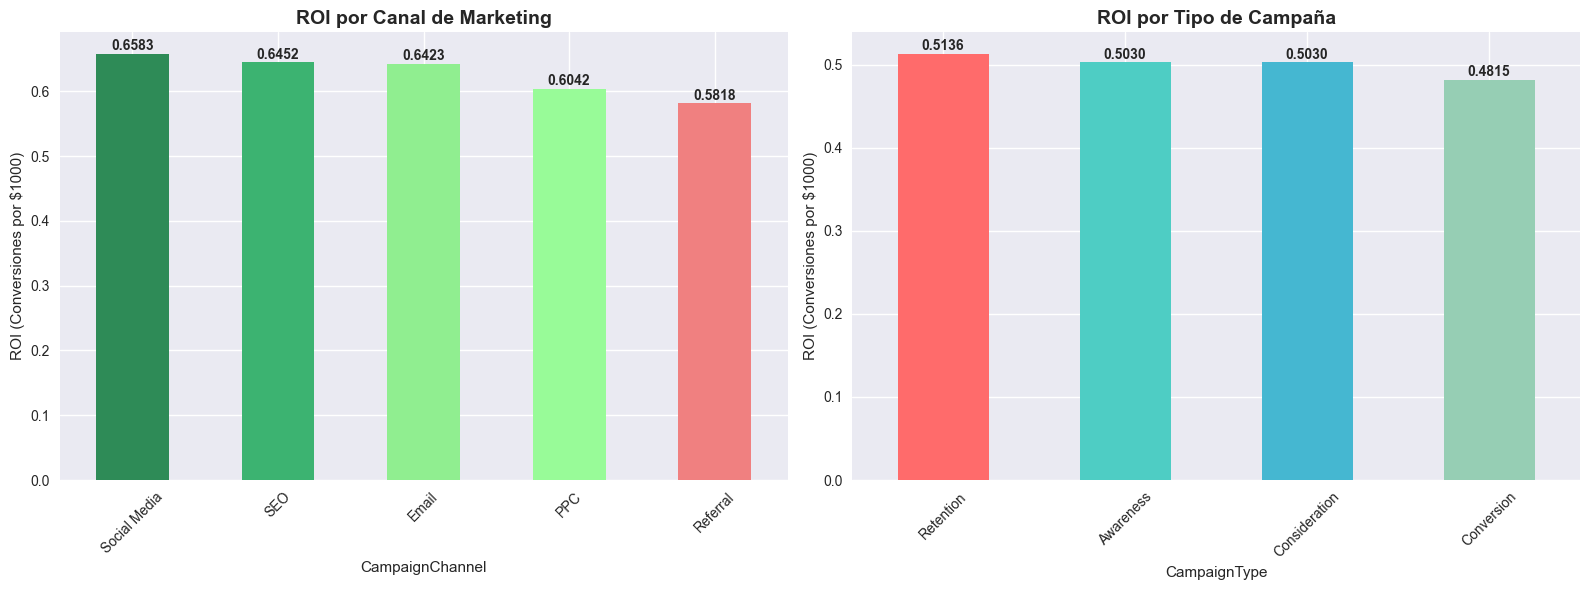

✅ Análisis completado exitosamente!


In [20]:
# VISUALIZACIÓN BÁSICA PERO EFECTIVA
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📈 GENERANDO VISUALIZACIONES CLAVE...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: ROI por Canal
channel_roi_sorted.plot(kind='bar', ax=ax1, color=['#2E8B57', '#3CB371', '#90EE90', '#98FB98', '#F08080'])
ax1.set_title('ROI por Canal de Marketing', fontweight='bold', fontsize=14)
ax1.set_ylabel('ROI (Conversiones por $1000)')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(channel_roi_sorted):
    ax1.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: ROI por Tipo de Campaña
campaign_roi_sorted.plot(kind='bar', ax=ax2, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax2.set_title('ROI por Tipo de Campaña', fontweight='bold', fontsize=14)
ax2.set_ylabel('ROI (Conversiones por $1000)')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(campaign_roi_sorted):
    ax2.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Análisis completado exitosamente!")

In [21]:
print("=" * 80)
print("📊 ANÁLISIS DEMOGRÁFICO: GÉNERO Y EDAD")
print("=" * 80)

# 1. PREPARACIÓN DE VARIABLES CATEGÓRICAS
print("\n🔍 1. PREPARANDO VARIABLES CATEGÓRICAS...")

# Crear categorías de edad
df_clean['Age_Group'] = pd.cut(df_clean['Age'], 
                              bins=[18, 25, 35, 45, 55, 65, 70],
                              labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

print("✅ Grupos de edad creados:")
print(df_clean['Age_Group'].value_counts().sort_index())

# 2. ANÁLISIS BIVARIADO: GÉNERO + GRUPO DE EDAD
print("\n📈 2. ANÁLISIS BIVARIADO - GÉNERO Y GRUPO DE EDAD")

# Cross tabulation básica
cross_tab = pd.crosstab(df_clean['Age_Group'], df_clean['Gender'], margins=True)
print("Distribución de clientes por Edad y Género:")
print(cross_tab)
print("\n")

# Cross tabulation con conversión
cross_tab_conv = pd.crosstab([df_clean['Age_Group'], df_clean['Gender']], 
                            df_clean['Conversion'], 
                            margins=True, normalize='index') * 100

print("Tasa de Conversión por Grupo Demográfico (%):")
print(cross_tab_conv.round(2))

📊 ANÁLISIS DEMOGRÁFICO: GÉNERO Y EDAD

🔍 1. PREPARANDO VARIABLES CATEGÓRICAS...
✅ Grupos de edad creados:
Age_Group
18-25    1045
26-35    1522
36-45    1603
46-55    1536
56-65    1529
66+       617
Name: count, dtype: int64

📈 2. ANÁLISIS BIVARIADO - GÉNERO Y GRUPO DE EDAD
Distribución de clientes por Edad y Género:
Gender     Female  Male   All
Age_Group                    
18-25         631   414  1045
26-35         898   624  1522
36-45         998   605  1603
46-55         922   614  1536
56-65         921   608  1529
66+           379   238   617
All          4749  3103  7852


Tasa de Conversión por Grupo Demográfico (%):
Conversion            0      1
Age_Group Gender              
18-25     Female  13.95  86.05
          Male    14.01  85.99
26-35     Female  13.81  86.19
          Male    11.54  88.46
36-45     Female  10.72  89.28
          Male     8.43  91.57
46-55     Female  12.26  87.74
          Male    15.15  84.85
56-65     Female  11.18  88.82
          Male    12.

In [22]:
# 3. ANÁLISIS ESTADÍSTICO POR SEGMENTO DEMOGRÁFICO
print("\n" + "=" * 80)
print("📊 ANÁLISIS ESTADÍSTICO POR SEGMENTO DEMOGRÁFICO")
print("=" * 80)

# Métricas clave por género y grupo de edad
demographic_analysis = df_clean.groupby(['Age_Group', 'Gender']).agg({
    'CustomerID': 'count',
    'Conversion': ['mean', 'sum'],
    'Income': 'mean',
    'AdSpend': 'mean',
    'ClickThroughRate': 'mean',
    'TimeOnSite': 'mean',
    'PreviousPurchases': 'mean',
    'LoyaltyPoints': 'mean'
}).round(3)

# Flatten column names
demographic_analysis.columns = ['_'.join(col).strip() for col in demographic_analysis.columns.values]
demographic_analysis = demographic_analysis.rename(columns={'CustomerID_count': 'N_Clientes'})

print("📈 Métricas por Segmento Demográfico:")
print(demographic_analysis)

# 4. ANÁLISIS DE PERFORMANCE DE MARKETING POR DEMOGRÁFICA
print("\n🎯 PERFORMANCE DE MARKETING POR DEMOGRÁFICA:")

marketing_by_demo = df_clean.groupby(['Age_Group', 'Gender']).agg({
    'Conversion': 'mean',
    'AdSpend': 'mean',
    'ClickThroughRate': 'mean',
    'ConversionRate': 'mean',
    'EmailClicks': 'mean',
    'SocialShares': 'mean'
}).round(4)

print(marketing_by_demo)


📊 ANÁLISIS ESTADÍSTICO POR SEGMENTO DEMOGRÁFICO
📈 Métricas por Segmento Demográfico:
                  N_Clientes  Conversion_mean  Conversion_sum  Income_mean  \
Age_Group Gender                                                             
18-25     Female         631            0.861             543    83899.450   
          Male           414            0.860             356    83807.597   
26-35     Female         898            0.862             774    85648.586   
          Male           624            0.885             552    82777.950   
36-45     Female         998            0.893             891    85859.533   
          Male           605            0.916             554    84910.096   
46-55     Female         922            0.877             809    85174.745   
          Male           614            0.849             521    81045.451   
56-65     Female         921            0.888             818    86360.061   
          Male           608            0.872           


📊 GENERANDO VISUALIZACIONES DEMOGRÁFICAS...


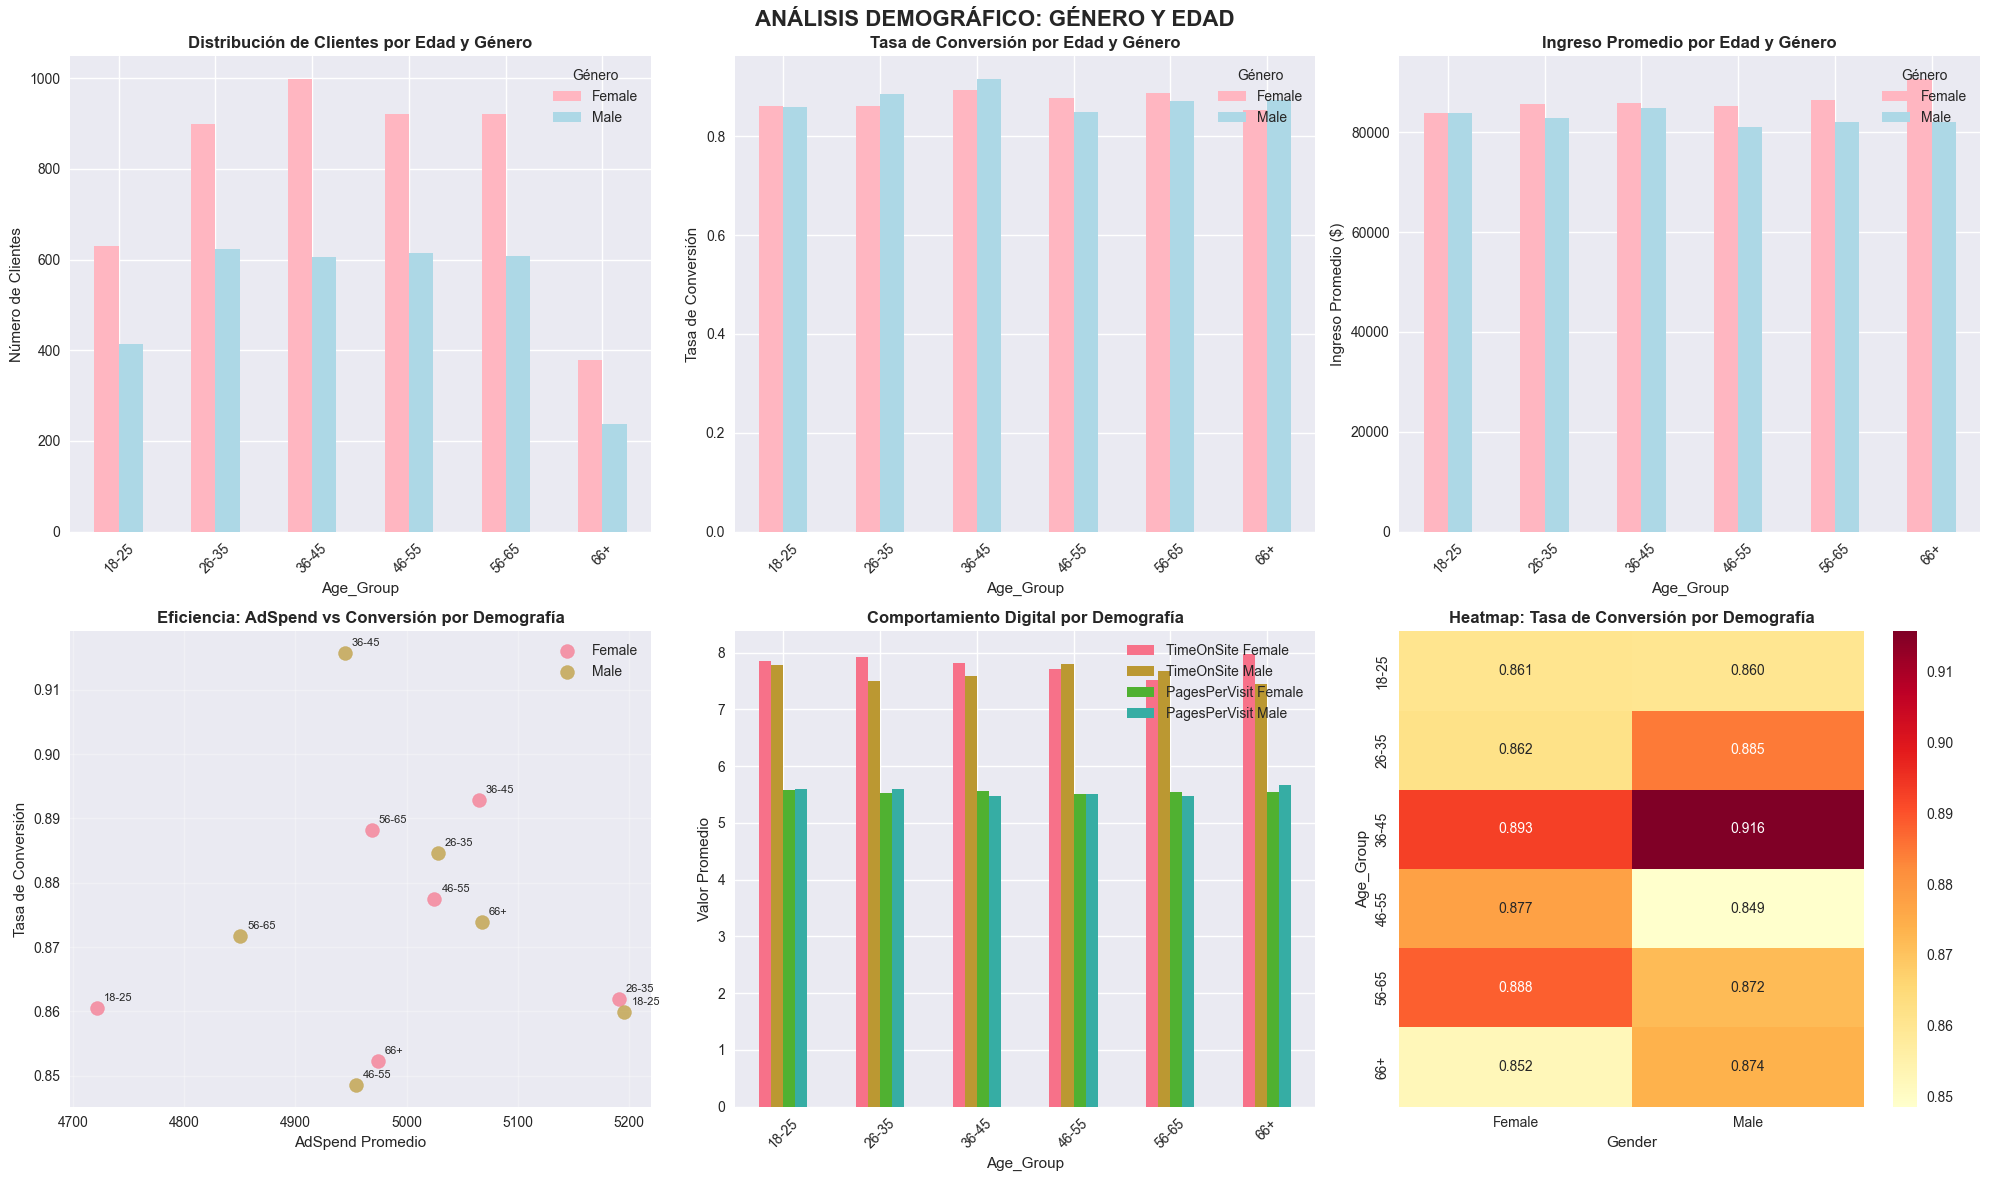

In [23]:
print("\n📊 GENERANDO VISUALIZACIONES DEMOGRÁFICAS...")

# Configurar el estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Crear visualizaciones
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('ANÁLISIS DEMOGRÁFICO: GÉNERO Y EDAD', fontsize=16, fontweight='bold')

# Gráfico 1: Distribución por Edad y Género
age_gender_dist = pd.crosstab(df_clean['Age_Group'], df_clean['Gender'])
age_gender_dist.plot(kind='bar', ax=axes[0,0], color=['lightpink', 'lightblue'])
axes[0,0].set_title('Distribución de Clientes por Edad y Género', fontweight='bold')
axes[0,0].set_ylabel('Número de Clientes')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='Género')

# Gráfico 2: Tasa de Conversión por Demografía
conv_by_demo = df_clean.groupby(['Age_Group', 'Gender'])['Conversion'].mean().unstack()
conv_by_demo.plot(kind='bar', ax=axes[0,1], color=['lightpink', 'lightblue'])
axes[0,1].set_title('Tasa de Conversión por Edad y Género', fontweight='bold')
axes[0,1].set_ylabel('Tasa de Conversión')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Género')

# Gráfico 3: Ingreso Promedio por Demografía
income_by_demo = df_clean.groupby(['Age_Group', 'Gender'])['Income'].mean().unstack()
income_by_demo.plot(kind='bar', ax=axes[0,2], color=['lightpink', 'lightblue'])
axes[0,2].set_title('Ingreso Promedio por Edad y Género', fontweight='bold')
axes[0,2].set_ylabel('Ingreso Promedio ($)')
axes[0,2].tick_params(axis='x', rotation=45)
axes[0,2].legend(title='Género')

# Gráfico 4: AdSpend vs Conversión por Demografía
spend_conv_demo = df_clean.groupby(['Age_Group', 'Gender']).agg({'AdSpend': 'mean', 'Conversion': 'mean'}).reset_index()
for gender in ['Female', 'Male']:
    data = spend_conv_demo[spend_conv_demo['Gender'] == gender]
    axes[1,0].scatter(data['AdSpend'], data['Conversion'], 
                     label=gender, s=100, alpha=0.7)
    for _, row in data.iterrows():
        axes[1,0].annotate(f"{row['Age_Group']}", 
                          (row['AdSpend'], row['Conversion']),
                          xytext=(5, 5), textcoords='offset points',
                          fontsize=8)
axes[1,0].set_xlabel('AdSpend Promedio')
axes[1,0].set_ylabel('Tasa de Conversión')
axes[1,0].set_title('Eficiencia: AdSpend vs Conversión por Demografía', fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Gráfico 5: Comportamiento Digital por Demografía
digital_metrics = df_clean.groupby(['Age_Group', 'Gender'])[['TimeOnSite', 'PagesPerVisit']].mean().unstack()
digital_metrics.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Comportamiento Digital por Demografía', fontweight='bold')
axes[1,1].set_ylabel('Valor Promedio')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(['TimeOnSite Female', 'TimeOnSite Male', 'PagesPerVisit Female', 'PagesPerVisit Male'])

# Gráfico 6: Heatmap de Conversión por Demografía
pivot_conv = df_clean.groupby(['Age_Group', 'Gender'])['Conversion'].mean().unstack()
sns.heatmap(pivot_conv, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[1,2])
axes[1,2].set_title('Heatmap: Tasa de Conversión por Demografía', fontweight='bold')

plt.tight_layout()
plt.show()

In [25]:
# 5. ANÁLISIS DE PREFERENCIAS DE CANAL POR DEMOGRAFÍA
print("\n" + "=" * 80)
print("📱 PREFERENCIAS DE CANAL POR DEMOGRAFÍA")
print("=" * 80)

# Canal preferido por cada segmento demográfico
channel_preference = pd.crosstab([df_clean['Age_Group'], df_clean['Gender']], 
                                df_clean['CampaignChannel'], 
                                normalize='index') * 100

print("Preferencia de Canal por Segmento Demográfico (%):")
print(channel_preference.round(2))

# Tipo de campaña preferido por demografía
campaign_preference = pd.crosstab([df_clean['Age_Group'], df_clean['Gender']], 
                                 df_clean['CampaignType'], 
                                 normalize='index') * 100

print("\nPreferencia de Tipo de Campaña por Segmento Demográfico (%):")
print(campaign_preference.round(2))


📱 PREFERENCIAS DE CANAL POR DEMOGRAFÍA
Preferencia de Canal por Segmento Demográfico (%):
CampaignChannel   Email    PPC  Referral    SEO  Social Media
Age_Group Gender                                             
18-25     Female  22.66  19.97     21.71  16.48         19.18
          Male    18.36  21.98     21.01  20.77         17.87
26-35     Female  20.38  21.49     20.60  19.27         18.26
          Male    20.67  20.99     21.96  17.15         19.23
36-45     Female  19.64  19.64     21.64  21.34         17.74
          Male    18.18  20.17     19.50  18.18         23.97
46-55     Female  18.44  21.15     20.82  18.98         20.61
          Male    21.01  17.92     21.82  19.87         19.38
56-65     Female  19.11  21.61     22.37  19.98         16.94
          Male    16.78  23.03     21.22  19.90         19.08
66+       Female  18.47  18.47     25.59  20.32         17.15
          Male    20.17  20.59     20.17  20.17         18.91

Preferencia de Tipo de Campaña por Segme


📱 GENERANDO VISUALIZACIÓN DE PREFERENCIAS...


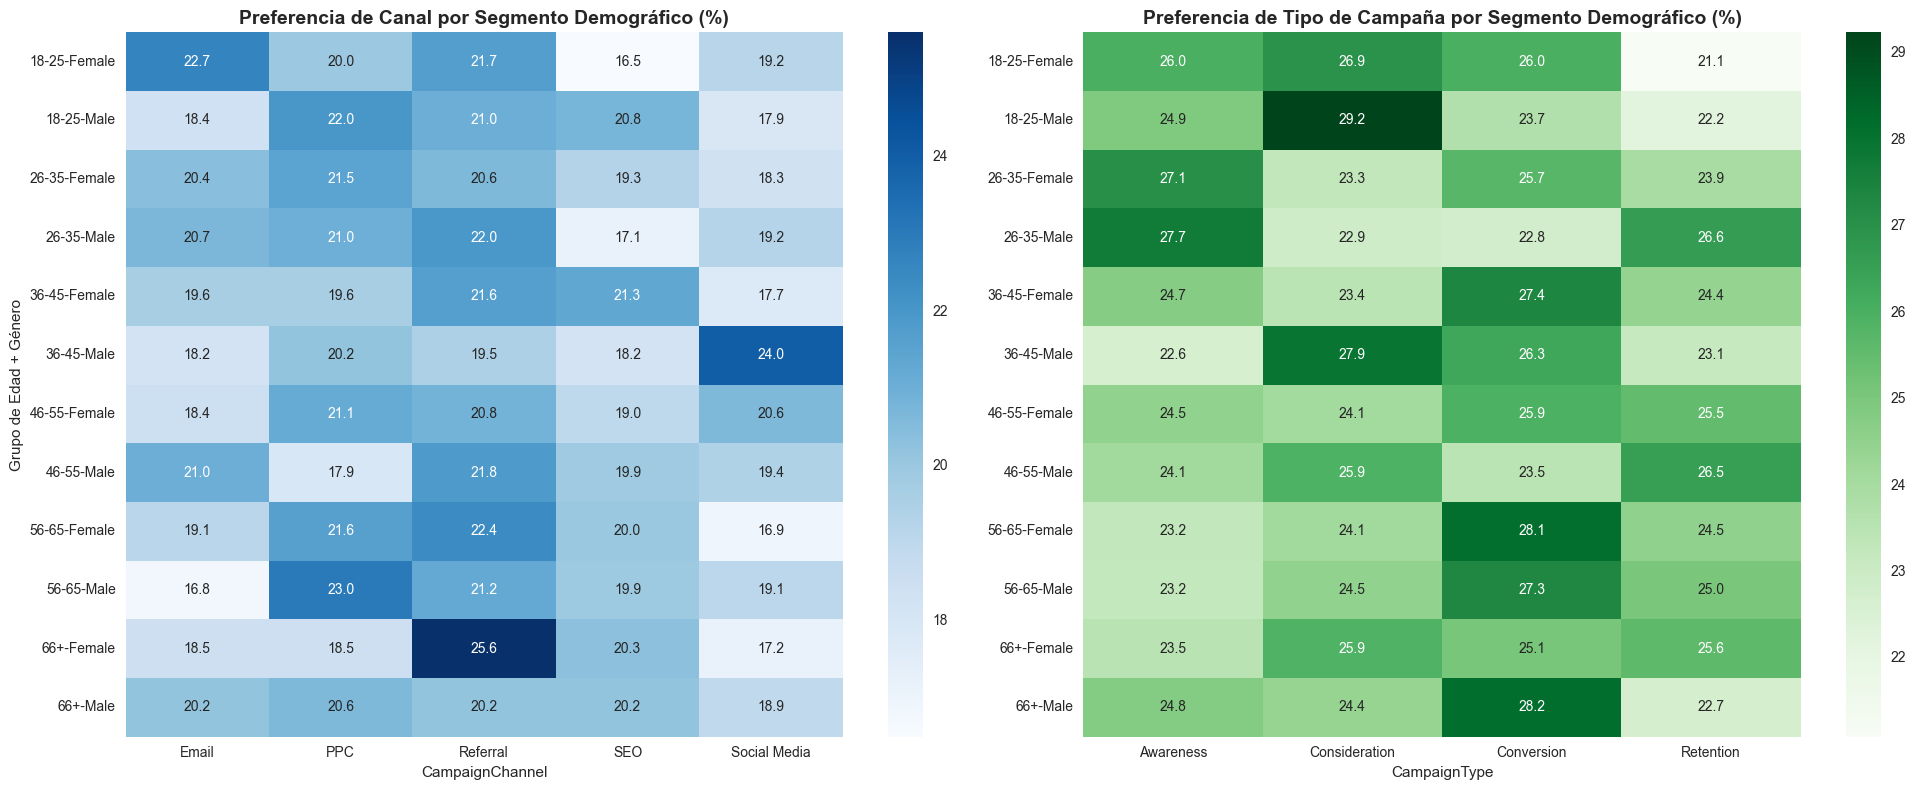

In [26]:
# VISUALIZACIÓN DE PREFERENCIAS
print("\n📱 GENERANDO VISUALIZACIÓN DE PREFERENCIAS...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap de preferencia de canal
sns.heatmap(channel_preference, annot=True, fmt='.1f', cmap='Blues', ax=ax1)
ax1.set_title('Preferencia de Canal por Segmento Demográfico (%)', fontweight='bold', fontsize=14)
ax1.set_ylabel('Grupo de Edad + Género')

# Heatmap de preferencia de tipo de campaña
sns.heatmap(campaign_preference, annot=True, fmt='.1f', cmap='Greens', ax=ax2)
ax2.set_title('Preferencia de Tipo de Campaña por Segmento Demográfico (%)', fontweight='bold', fontsize=14)
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

In [27]:
# 6. TEST ESTADÍSTICO PARA VERIFICAR DIFERENCIAS
print("\n" + "=" * 80)
print("🔬 ANÁLISIS ESTADÍSTICO - SIGNIFICANCIA DE DIFERENCIAS")
print("=" * 80)

from scipy.stats import chi2_contingency, f_oneway

# Test Chi-cuadrado para género y conversión
chi2_gender = pd.crosstab(df_clean['Gender'], df_clean['Conversion'])
chi2, p_value, dof, expected = chi2_contingency(chi2_gender)
print(f"📊 Test Chi-cuadrado - Género vs Conversión:")
print(f"   Chi2: {chi2:.4f}, p-value: {p_value:.4f}")
print(f"   ¿Diferencias significativas? {'SÍ' if p_value < 0.05 else 'NO'}")

# Test ANOVA para edad y conversión
age_groups_conv = [df_clean[df_clean['Age_Group'] == group]['Conversion'] for group in df_clean['Age_Group'].unique()]
f_stat, p_value_age = f_oneway(*age_groups_conv)
print(f"\n📊 Test ANOVA - Grupo Edad vs Conversión:")
print(f"   F-statistic: {f_stat:.4f}, p-value: {p_value_age:.4f}")
print(f"   ¿Diferencias significativas? {'SÍ' if p_value_age < 0.05 else 'NO'}")

# Test para ingresos por género
from scipy.stats import ttest_ind
income_female = df_clean[df_clean['Gender'] == 'Female']['Income']
income_male = df_clean[df_clean['Gender'] == 'Male']['Income']
t_stat, p_value_income = ttest_ind(income_female, income_male)
print(f"\n📊 Test T - Ingresos por Género:")
print(f"   T-statistic: {t_stat:.4f}, p-value: {p_value_income:.4f}")
print(f"   ¿Diferencias significativas? {'SÍ' if p_value_income < 0.05 else 'NO'}")


🔬 ANÁLISIS ESTADÍSTICO - SIGNIFICANCIA DE DIFERENCIAS
📊 Test Chi-cuadrado - Género vs Conversión:
   Chi2: 0.0038, p-value: 0.9510
   ¿Diferencias significativas? NO

📊 Test ANOVA - Grupo Edad vs Conversión:
   F-statistic: nan, p-value: nan
   ¿Diferencias significativas? NO

📊 Test T - Ingresos por Género:
   T-statistic: 3.7087, p-value: 0.0002
   ¿Diferencias significativas? SÍ


In [29]:
# 7. INSIGHTS Y RECOMENDACIONES
print("\n" + "=" * 80)
print("🎯 INSIGHTS Y RECOMENDACIONES ESTRATÉGICAS")
print("=" * 80)

# Encontrar segmentos más valiosos
segment_performance = df_clean.groupby(['Age_Group', 'Gender']).agg({
    'Conversion': 'mean',
    'Income': 'mean',
    'AdSpend': 'mean',
    'LoyaltyPoints': 'mean'
}).round(4)

segment_performance['ROI'] = (segment_performance['Conversion'] / segment_performance['AdSpend']) * 1000

print("🏆 TOP 3 SEGMENTOS MÁS VALIOSOS (por ROI):")
top_segments = segment_performance['ROI'].sort_values(ascending=False).head(3)
for i, (segment, roi) in enumerate(top_segments.items(), 1):
    age, gender = segment
    emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉"
    print(f"   {emoji} {age} {gender}: ROI = {roi:.4f}")

print("\n📉 TOP 3 SEGMENTOS MENOS VALIOSOS (por ROI):")
bottom_segments = segment_performance['ROI'].sort_values(ascending=True).head(3)
for i, (segment, roi) in enumerate(bottom_segments.items(), 1):
    age, gender = segment
    emoji = "🔻" if i == 1 else "⬇️" if i == 2 else "📉"
    print(f"   {emoji} {age} {gender}: ROI = {roi:.4f}")

print("\n📈 HALLAZGOS CLAVE:")
# Mejor segmento por conversión
best_conv_segment = segment_performance['Conversion'].idxmax()
worst_conv_segment = segment_performance['Conversion'].idxmin()
print(f"   • Mejor tasa conversión: {best_conv_segment} ({segment_performance.loc[best_conv_segment, 'Conversion']:.3f})")
print(f"   • Peor tasa conversión: {worst_conv_segment} ({segment_performance.loc[worst_conv_segment, 'Conversion']:.3f})")

# Mejor segmento por ingresos
best_income_segment = segment_performance['Income'].idxmax()
worst_income_segment = segment_performance['Income'].idxmin()
print(f"   • Mayor ingreso promedio: {best_income_segment} (${segment_performance.loc[best_income_segment, 'Income']:,.0f})")
print(f"   • Menor ingreso promedio: {worst_income_segment} (${segment_performance.loc[worst_income_segment, 'Income']:,.0f})")

# Análisis de brecha
roi_gap = top_segments.iloc[0] - bottom_segments.iloc[0]
conv_gap = segment_performance.loc[best_conv_segment, 'Conversion'] - segment_performance.loc[worst_conv_segment, 'Conversion']
print(f"   • Brecha ROI mejor/peor: {roi_gap:.4f}")
print(f"   • Brecha conversión mejor/peor: {conv_gap:.3f}")

print("\n💡 RECOMENDACIONES DE SEGMENTACIÓN:")
print("   1. INCREMENTAR inversión en segmentos top (alta eficiencia)")
print("   2. OPTIMIZAR segmentos bottom (revisar estrategias)")
print("   3. Desarrollar campañas personalizadas por grupo de edad")
print("   4. Crear mensajes específicos por género")
print("   5. Asignar presupuesto proporcional al valor del segmento")

print("\n🎯 ACCIONES ESPECÍFICAS PARA SEGMENTOS BOTTOM:")
worst_segment = bottom_segments.index[0]
age_worst, gender_worst = worst_segment
print(f"   • Segmento {age_worst} {gender_worst}:")
print(f"     - Investigar causas del bajo ROI")
print(f"     - Revisar canales preferidos")
print(f"     - Testear mensajes diferentes")
print(f"     - Considerar reducción temporal de inversión")

# Resumen ejecutivo
print(f"\n📊 RESUMEN EJECUTIVO:")
print(f"   • {len(df_clean['Age_Group'].unique())} grupos de edad analizados")
print(f"   • {len(df_clean['Gender'].unique())} categorías de género")
print(f"   • {len(df_clean.groupby(['Age_Group', 'Gender']))} segmentos demográficos únicos")
print(f"   • ROI varía entre {segment_performance['ROI'].min():.4f} y {segment_performance['ROI'].max():.4f}")
print(f"   • Diferencia ROI mejor/peor: {(segment_performance['ROI'].max()/segment_performance['ROI'].min()-1)*100:.1f}%")


🎯 INSIGHTS Y RECOMENDACIONES ESTRATÉGICAS
🏆 TOP 3 SEGMENTOS MÁS VALIOSOS (por ROI):
   🥇 36-45 Male: ROI = 0.1852
   🥈 18-25 Female: ROI = 0.1823
   🥉 56-65 Male: ROI = 0.1797

📉 TOP 3 SEGMENTOS MENOS VALIOSOS (por ROI):
   🔻 18-25 Male: ROI = 0.1655
   ⬇️ 26-35 Female: ROI = 0.1660
   📉 46-55 Male: ROI = 0.1713

📈 HALLAZGOS CLAVE:
   • Mejor tasa conversión: ('36-45', 'Male') (0.916)
   • Peor tasa conversión: ('46-55', 'Male') (0.849)
   • Mayor ingreso promedio: ('66+', 'Female') ($90,625)
   • Menor ingreso promedio: ('46-55', 'Male') ($81,045)
   • Brecha ROI mejor/peor: 0.0197
   • Brecha conversión mejor/peor: 0.067

💡 RECOMENDACIONES DE SEGMENTACIÓN:
   1. INCREMENTAR inversión en segmentos top (alta eficiencia)
   2. OPTIMIZAR segmentos bottom (revisar estrategias)
   3. Desarrollar campañas personalizadas por grupo de edad
   4. Crear mensajes específicos por género
   5. Asignar presupuesto proporcional al valor del segmento

🎯 ACCIONES ESPECÍFICAS PARA SEGMENTOS BOTTOM:
  


📊 GENERANDO VISUALIZACIÓN COMPARATIVA...


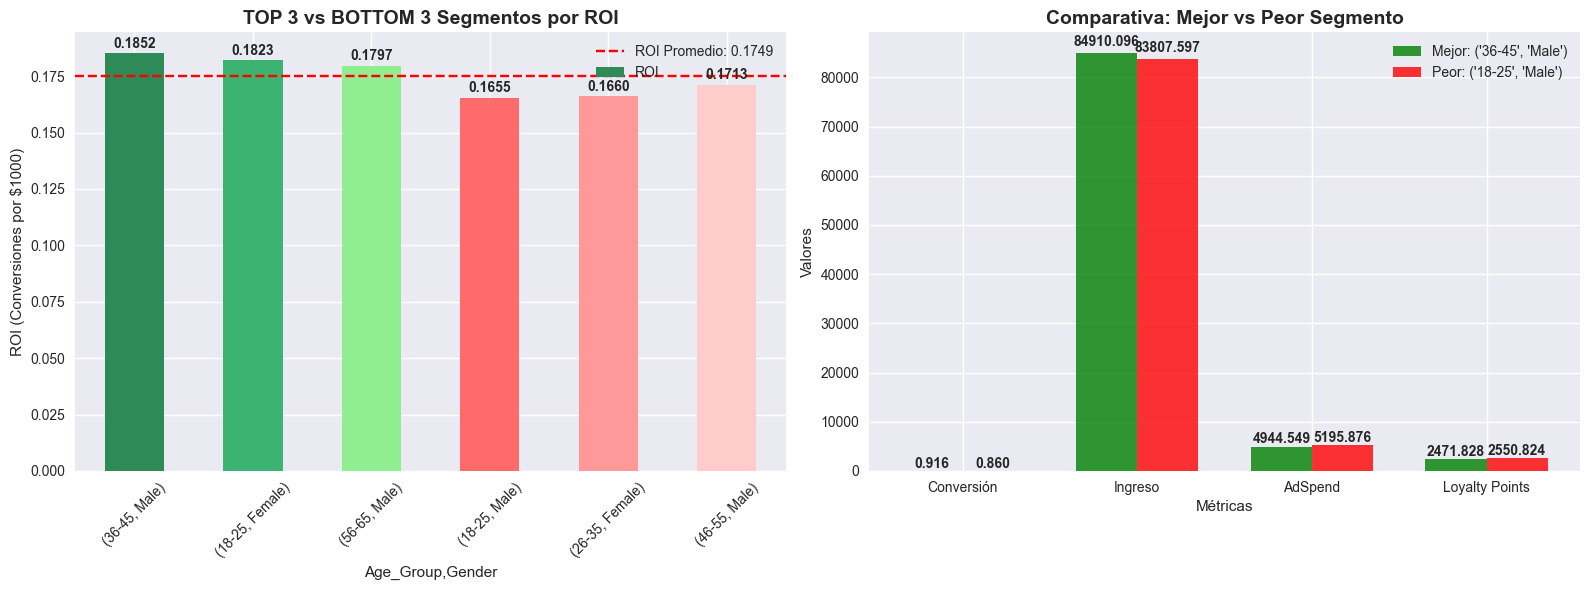

✅ Análisis completo de segmentos top y bottom generado!


In [30]:
# VISUALIZACIÓN COMPARATIVA
print("\n📊 GENERANDO VISUALIZACIÓN COMPARATIVA...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Top 3 vs Bottom 3 segmentos
all_segments_compare = pd.concat([top_segments, bottom_segments])
colors = ['#2E8B57', '#3CB371', '#90EE90', '#FF6B6B', '#FF9999', '#FFCCCC']
all_segments_compare.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('TOP 3 vs BOTTOM 3 Segmentos por ROI', fontweight='bold', fontsize=14)
ax1.set_ylabel('ROI (Conversiones por $1000)')
ax1.tick_params(axis='x', rotation=45)
ax1.axhline(y=segment_performance['ROI'].mean(), color='red', linestyle='--', 
           label=f'ROI Promedio: {segment_performance["ROI"].mean():.4f}')
ax1.legend()

# Añadir valores en las barras
for i, v in enumerate(all_segments_compare):
    ax1.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Comparativa de métricas del mejor vs peor segmento
best_segment = top_segments.index[0]
worst_segment = bottom_segments.index[0]

comparison_metrics = ['Conversion', 'Income', 'AdSpend', 'LoyaltyPoints']
best_values = [segment_performance.loc[best_segment, metric] for metric in comparison_metrics]
worst_values = [segment_performance.loc[worst_segment, metric] for metric in comparison_metrics]

x = np.arange(len(comparison_metrics))
width = 0.35

ax2.bar(x - width/2, best_values, width, label=f'Mejor: {best_segment}', alpha=0.8, color='green')
ax2.bar(x + width/2, worst_values, width, label=f'Peor: {worst_segment}', alpha=0.8, color='red')

ax2.set_xlabel('Métricas')
ax2.set_ylabel('Valores')
ax2.set_title('Comparativa: Mejor vs Peor Segmento', fontweight='bold', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(['Conversión', 'Ingreso', 'AdSpend', 'Loyalty Points'])
ax2.legend()

# Formatear valores en el gráfico
for i, (best, worst) in enumerate(zip(best_values, worst_values)):
    ax2.text(i - width/2, best + best*0.01, f'{best:.3f}', ha='center', va='bottom', fontweight='bold')
    ax2.text(i + width/2, worst + worst*0.01, f'{worst:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Análisis completo de segmentos top y bottom generado!")

In [31]:
# ANÁLISIS ESPECÍFICO DE SEGMENTOS PROBLEMÁTICOS
print("\n" + "=" * 80)
print("🔍 ANÁLISIS PROFUNDO DE SEGMENTOS BOTTOM")
print("=" * 80)

for i, (segment, roi) in enumerate(bottom_segments.items(), 1):
    age, gender = segment
    segment_data = df_clean[(df_clean['Age_Group'] == age) & (df_clean['Gender'] == gender)]
    
    print(f"\n📉 SEGMENTO {i}: {age} {gender} (ROI: {roi:.4f})")
    print(f"   • Tamaño muestra: {len(segment_data)} clientes")
    print(f"   • Tasa conversión: {segment_performance.loc[segment, 'Conversion']:.3f}")
    print(f"   • Ingreso promedio: ${segment_performance.loc[segment, 'Income']:,.0f}")
    print(f"   • AdSpend promedio: ${segment_performance.loc[segment, 'AdSpend']:.0f}")
    
    # Análisis de canales preferidos
    channel_dist = segment_data['CampaignChannel'].value_counts(normalize=True).head(3)
    print(f"   • Canales preferidos:")
    for channel, percent in channel_dist.items():
        print(f"     - {channel}: {percent:.1%}")
    
    # Análisis de tipos de campaña
    campaign_dist = segment_data['CampaignType'].value_counts(normalize=True).head(2)
    print(f"   • Tipos de campaña preferidos:")
    for campaign, percent in campaign_dist.items():
        print(f"     - {campaign}: {percent:.1%}")

print("\n💡 PLAN DE ACCIÓN PARA SEGMENTOS BOTTOM:")
print("   1. Realizar investigación cualitativa con estos segmentos")
print("   2. Testear diferentes mensajes y creatividades")
print("   3. Experimentar con canales alternativos")
print("   4. Considerar ajustar targeting o reducir inversión temporalmente")
print("   5. Monitorear performance después de cambios")


🔍 ANÁLISIS PROFUNDO DE SEGMENTOS BOTTOM

📉 SEGMENTO 1: 18-25 Male (ROI: 0.1655)
   • Tamaño muestra: 414 clientes
   • Tasa conversión: 0.860
   • Ingreso promedio: $83,808
   • AdSpend promedio: $5196
   • Canales preferidos:
     - PPC: 22.0%
     - Referral: 21.0%
     - SEO: 20.8%
   • Tipos de campaña preferidos:
     - Consideration: 29.2%
     - Awareness: 24.9%

📉 SEGMENTO 2: 26-35 Female (ROI: 0.1660)
   • Tamaño muestra: 898 clientes
   • Tasa conversión: 0.862
   • Ingreso promedio: $85,649
   • AdSpend promedio: $5191
   • Canales preferidos:
     - PPC: 21.5%
     - Referral: 20.6%
     - Email: 20.4%
   • Tipos de campaña preferidos:
     - Awareness: 27.1%
     - Conversion: 25.7%

📉 SEGMENTO 3: 46-55 Male (ROI: 0.1713)
   • Tamaño muestra: 614 clientes
   • Tasa conversión: 0.849
   • Ingreso promedio: $81,045
   • AdSpend promedio: $4954
   • Canales preferidos:
     - Referral: 21.8%
     - Email: 21.0%
     - SEO: 19.9%
   • Tipos de campaña preferidos:
     - Reten

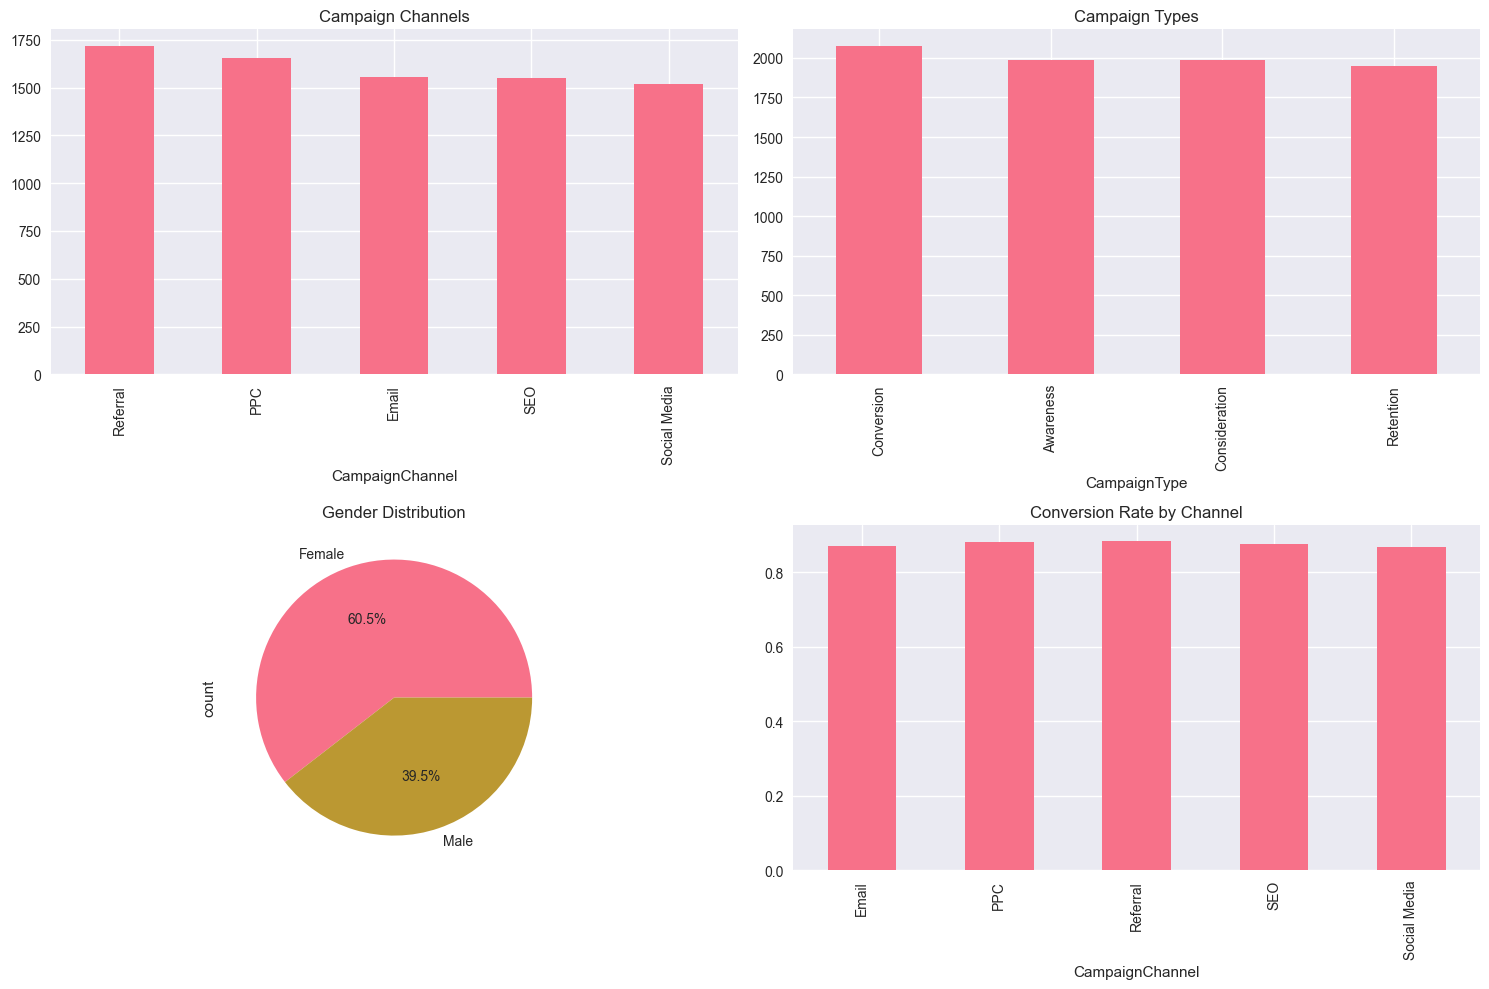

=== CONVERSION BY CHANNEL ===
                 count   sum      mean  conversion_rate
CampaignChannel                                        
Email             1557  1355  0.870263         0.870263
PPC               1655  1461  0.882779         0.882779
Referral          1719  1518  0.883072         0.883072
SEO               1550  1359  0.876774         0.876774
Social Media      1519  1319  0.868334         0.868334


In [34]:
# Channel and campaign type distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df_clean['CampaignChannel'].value_counts().plot(kind='bar', ax=axes[0,0], title='Campaign Channels')
df_clean['CampaignType'].value_counts().plot(kind='bar', ax=axes[0,1], title='Campaign Types')
df_clean['Gender'].value_counts().plot(kind='pie', ax=axes[1,0], title='Gender Distribution', autopct='%1.1f%%')

# Conversion by channel
conv_by_channel = df_clean.groupby('CampaignChannel')['Conversion'].agg(['count', 'sum', 'mean'])
conv_by_channel['conversion_rate'] = conv_by_channel['mean']
conv_by_channel['conversion_rate'].plot(kind='bar', ax=axes[1,1], title='Conversion Rate by Channel')

plt.tight_layout()
plt.show()

print("=== CONVERSION BY CHANNEL ===")
print(conv_by_channel)

In [35]:
# Create engagement score
df_clean['EngagementScore'] = (df_clean['WebsiteVisits'] + df_clean['SocialShares'] + 
                        df_clean['EmailOpens'] + df_clean['EmailClicks']) / 4

# Customer value score
df_clean['CustomerValue'] = df_clean['Income'] / 1000 + df_clean['LoyaltyPoints'] / 100 + df_clean['PreviousPurchases'] * 10

# Channel efficiency metrics
df_clean['CostPerClick'] = df_clean['AdSpend'] / (df_clean['ClickThroughRate'] * 1000 + 1)  # Avoid division by zero
df_clean['ROAS'] = df_clean['ConversionRate'] / (df_clean['AdSpend'] / 1000 + 0.001)  # Return on Ad Spend proxy

# Time on site efficiency
df_clean['PageEfficiency'] = df_clean['PagesPerVisit'] / df_clean['TimeOnSite']

# Create customer segments
df_clean['IncomeSegment'] = pd.cut(df_clean['Income'], bins=3, labels=['Low', 'Medium', 'High'])
df_clean['AgeSegment'] = pd.cut(df_clean['Age'], bins=3, labels=['Young', 'Middle', 'Senior'])

print("=== NEW FEATURES CREATED ===")
new_features = ['EngagementScore', 'CustomerValue', 'CostPerClick', 'ROAS', 'PageEfficiency']
print(df_clean[new_features].describe())

=== NEW FEATURES CREATED ===
       EngagementScore  CustomerValue  CostPerClick         ROAS  \
count      8000.000000    8000.000000   8000.000000  8000.000000   
mean         22.123906     154.421882     57.771086     0.047293   
std           8.212031      49.264343     83.487393     0.098103   
min           1.250000      22.104000      0.419804     0.001081   
25%          16.000000     118.279250     16.093759     0.011212   
50%          22.250000     154.819000     31.975843     0.020905   
75%          28.250000     190.166750     60.273694     0.041897   
max          42.500000     286.369000    796.055910     1.769071   

       PageEfficiency  
count     8000.000000  
mean         1.307483  
std          1.800035  
min          0.070936  
25%          0.420218  
50%          0.716333  
75%          1.379929  
max         18.165403  


In [36]:
# Journey complexity score
df_clean['JourneyComplexity'] = (df_clean['WebsiteVisits'] + df_clean['EmailOpens'] + 
                          df_clean['SocialShares'] + df_clean['PreviousPurchases']) / 4

# Channel touchpoint intensity
channel_intensity = {}
for channel in df_clean['CampaignChannel'].unique():
    channel_mask = df_clean['CampaignChannel'] == channel
    intensity = df_clean.loc[channel_mask, ['WebsiteVisits', 'EmailOpens', 'SocialShares']].mean().mean()
    channel_intensity[channel] = intensity

print("=== CHANNEL TOUCHPOINT INTENSITY ===")
for channel, intensity in channel_intensity.items():
    print(f"{channel}: {intensity:.2f}")

# First-touch attribution (customers with previous purchases = 0)
first_touch = df_clean[df_clean['PreviousPurchases'] == 0]
print(f"\n=== FIRST-TOUCH ATTRIBUTION ===")
print(f"First-touch customers: {len(first_touch)}")
print("Conversion by channel (first-touch):")
print(first_touch.groupby('CampaignChannel')['Conversion'].agg(['count', 'mean']))

# Multi-touch customers (previous purchases > 0)
multi_touch = df_clean[df_clean['PreviousPurchases'] > 0]
print(f"\n=== MULTI-TOUCH ATTRIBUTION ===")
print(f"Multi-touch customers: {len(multi_touch)}")
print("Conversion by channel (multi-touch):")
print(multi_touch.groupby('CampaignChannel')['Conversion'].agg(['count', 'mean']))

=== CHANNEL TOUCHPOINT INTENSITY ===
Social Media: 28.52
Email: 27.96
PPC: 27.69
Referral: 28.16
SEO: 27.73

=== FIRST-TOUCH ATTRIBUTION ===
First-touch customers: 838
Conversion by channel (first-touch):
                 count      mean
CampaignChannel                 
Email              146  0.787671
PPC                189  0.772487
Referral           178  0.814607
SEO                153  0.764706
Social Media       172  0.726744

=== MULTI-TOUCH ATTRIBUTION ===
Multi-touch customers: 7162
Conversion by channel (multi-touch):
                 count      mean
CampaignChannel                 
Email             1411  0.878809
PPC               1466  0.896999
Referral          1541  0.890980
SEO               1397  0.889048
Social Media      1347  0.886414


In [38]:
# Attribution modeling - Shapley value approximation
def calculate_channel_attribution(df_clean):
    attribution = {}
    
    for channel in df_clean['CampaignChannel'].unique():
        channel_data = df_clean[df_clean['CampaignChannel'] == channel]
        
        # Direct attribution
        direct_conversions = channel_data['Conversion'].sum()
        direct_rate = channel_data['Conversion'].mean()
        
        # Assisted attribution (based on engagement)
        engagement_weight = channel_data['EngagementScore'].mean()
        spend_efficiency = channel_data['ROAS'].mean()
        
        # Combined attribution score
        attribution_score = (direct_rate * 0.5 + 
                           engagement_weight * 0.3 + 
                           spend_efficiency * 0.2)
        
        attribution[channel] = {
            'direct_conversions': direct_conversions,
            'conversion_rate': direct_rate,
            'attribution_score': attribution_score,
            'total_spend': channel_data['AdSpend'].sum()
        }
    
    return attribution

attribution_results = calculate_channel_attribution(df_clean)

print("=== CHANNEL ATTRIBUTION ANALYSIS ===")
for channel, metrics in attribution_results.items():
    print(f"\n{channel}:")
    print(f"  Direct conversions: {metrics['direct_conversions']}")
    print(f"  Conversion rate: {metrics['conversion_rate']:.2%}")
    print(f"  Attribution score: {metrics['attribution_score']:.3f}")
    print(f"  Total spend: ${metrics['total_spend']:,.0f}")

=== CHANNEL ATTRIBUTION ANALYSIS ===

Social Media:
  Direct conversions: 1319
  Conversion rate: 86.83%
  Attribution score: 7.199
  Total spend: $7,542,323

Email:
  Direct conversions: 1355
  Conversion rate: 87.03%
  Attribution score: 7.074
  Total spend: $7,871,576

PPC:
  Direct conversions: 1461
  Conversion rate: 88.28%
  Attribution score: 7.016
  Total spend: $8,199,237

Referral:
  Direct conversions: 1518
  Conversion rate: 88.31%
  Attribution score: 7.127
  Total spend: $8,653,519

SEO:
  Direct conversions: 1359
  Conversion rate: 87.68%
  Attribution score: 7.012
  Total spend: $7,740,904
